# Exploratory Data Analysis

In this notebook we carry out EDA on the weather dataset after preprocessing

## 1. Import Packages & Data

**df** is weather observations as obtained from Dublin Airport.

See 01_Data_Prep for list of new variables and preprocessing steps undertaken.

In [ ]:
!pip install neptune-notebooks
!jupyter nbextension enable --py neptune-notebooks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 

In [ ]:
# data processing
import pandas as pd
import numpy as np
from collections import Counter
import missingno
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

# visualisations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# other
from tqdm import tqdm
import os
import sys
seed=42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing data and helper functions from directories dependent on which is available

joseph_path = '/content/drive/My Drive/DS_Modules/CA4021 (Final Year Project)/' # Joseph
julita_path = '/content/drive/My Drive/CA4021 (Final Year Project)/' # Julita

if os.path.exists(joseph_path):
  print("Importing from DS_Modules/CA4021")
  sys.path.append(os.path.join(joseph_path, 'scripts'))
  path = joseph_path

elif os.path.exists(julita_path):
  print("Importing directly from CA4021 folder")
  sys.path.append(sys.path.append(os.path.join(julita_path, 'scripts')))
  path = julita_path

Importing from DS_Modules/CA4021


In [ ]:
# import helper functions from aux file (prevents too much function definitions in the notebook)
from aux_functions import missing_percentages, plot_dist_discrete, plot_dist_continuous, \
plot_vis_discrete, plot_vis_continuous, month_vplot

In [ ]:
# import the preprocessed data
df_train = pd.read_csv(os.path.join(path, 'data/train_data.csv'))
df_train.index=pd.to_datetime(df_train.date_time)
df_train.date_time = df_train.index

df_test = pd.read_csv(os.path.join(path, 'data/test_data.csv'))
df_test.index=pd.to_datetime(df_test.date_time)
df_test.date_time = df_test.index

# combine train and test datasets for EDA
df = pd.concat([df_train, df_test], axis=0)

# fog duration dataset
fog_df = pd.read_csv(os.path.join(path, 'data/fog_duration_data.csv'))
fog_df.index=pd.to_datetime(fog_df.date_time)
fog_df.date_time = fog_df.index

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df.shape

(96432, 57)

In [ ]:
df.head()

date_time  year  month  day  hour                  date  dir  speed   vis  ww   w  pchar  ptend     cbl     msl  drybulb  wetbulb  dewpt   vp  rh  clow  cmedium  chigh  nlc  ntot  hlc  nsig1  tsig1  hsig1  nsig2  tsig2  hsig2  nsig3  tsig3  hsig3  nsig4  tsig4  hsig4  ceiling  dos  weather  duration  rainfall  sunshine  tabdir  tabspeed  pweather  dni  vis_hr1  target_hr1 fog_state  season  temp_dew_dist  rainfall12hma  fog_formation  fog_dissipation  transition
date_time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
2011-01-01 00:00:00 2011-01-01 00:00:00  2011      1    1     0  01-Jan-2011 00:00:00   27      7  9000  10  22      5    0.1  1017.1  1027.8      5.5      4.6    3.3  7.8  86   5.0      0.0    0.0    7     7   22      7      6     22    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       22  0.0        0       0.0       0.0       0.0      26         6         0    0   9000.0           0    no fog  winter            2.2            0.0              0                0           0
2011-01-01 01:00:00 2011-01-01 01:00:00  2011      1    1     1  01-Jan-2011 01:00:00   28      6  9000  10  22      5    0.0  1017.1  1027.8      5.1      4.4    3.4  7.8  89   5.0      0.0    0.0    7     7   22      7      6     22    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       22  0.0        0       0.0       0.0       0.0      28         6         0    0   8000.0           0    no fog  winter            1.7            0.0              0                0           0
2011-01-01 02:00:00 2011-01-01 02:00:00  2011      1    1     2  01-Jan-2011 02:00:00   27      6  8000  10  22      8    0.2  1016.8  1027.5      5.3      4.0    2.1  7.1  80   5.0      0.0    0.0    7     7   22      7      6     22    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       22  0.0        0       0.0       0.0       0.0      27         7         0    0   8000.0           0    no fog  winter            3.2            0.0              0                0           0
2011-01-01 03:00:00 2011-01-01 03:00:00  2011      1    1     3  01-Jan-2011 03:00:00   25      7  8000  10  22      7    0.5  1016.6  1027.3      5.2      4.6    3.7  8.0  90   5.0      0.0    0.0    7     7   23      7      6     23    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       23  0.0        0       0.0       0.0       0.0      27         7         0    0   8000.0           0    no fog  winter            1.5            0.0              0                0           0
2011-01-01 04:00:00 2011-01-01 04:00:00  2011      1    1     4  01-Jan-2011 04:00:00   28      7  8000  10  22      6    0.5  1016.6  1027.3      5.1      4.7    4.1  8.2  94   5.0      0.0    0.0    7     7   24      7      6     24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       24  0.0        0       0.0       0.0       0.0      27         7         0    0   9000.0           0    no fog  winter            1.0            0.0              0                0           0

In [ ]:
# to keep record of variables that aren't carried into the final exported data at the end
metadata = ['date', 'date_time', 'year', 'month', 'day', 'hour', 'season']
indicator = [col for col in df.columns if col[0] == 'i']
constant = [var for var in df.columns if len(df[var].value_counts()) == 1]
codes = ['sp1', 'sp2', 'sp3', 'sp4', 'wwa', 'wa'] # 'w' ,'ww', 'pweather', 'weather'
excluded = indicator + constant + codes + ['rgauge', 'sog']
vis_vars=['target_hr1', 'vis_hr1', 'transition', 'fog_formation', 'fog_dissipation']
target = 'target_hr1'

categorical=['fog_state', 'season', 'tsig1', 'tsig2', 'tsig3', 'pchar', 'w', 'ww', 'pweather',
             'weather']
discrete = [var for var in df.columns if len(df[var].unique()) < 15 and 
             var not in excluded + categorical + metadata + codes + indicator + vis_vars]

continuous = [var for var in df.columns if var not in discrete + excluded + categorical + metadata + codes + indicator + vis_vars]

# conservative list of variables known to have an impact on fog formation.
# the other lists are too big for certain visualisations
fog_vars = ['rainfall', 'drybulb', 'cbl', 'ntot', 'dni', 'dewpt', 'speed', 'dir', 'rh']

## 2. Data Analysis

EDA, looking at variable distributions, possible values, and trends aggregated across the years.

Notes:  

the hsig and tsig variables are weird...
hsig4 = 0 suggests that the 4th significant cloud layer is at height 0 feet. This implicitely means that the cloud layer doesn't exist, and the corresponding tsig4 is 0. But there are also cloud layers with type 0 that have hsig != 0. So what does tsig4 = 0 really cover?

In [ ]:
# fog events account for less than 1% of the dataset.
df[target].value_counts(normalize=True)

0    0.992243
1    0.007757
Name: target_hr1, dtype: float64

### Unique values for each variable

In [ ]:
# check unique values from each variable
print("CATEGORICAL")
for var in categorical:
  print(var+"\nExample values:", df[var].unique()[:5])
  print("unique values:", len(df[var].unique()))
  print()
  print("type:", df[var].dtype)
  print("-"*50)


CATEGORICAL
fog_state
Example values: ['no fog' 'fog']
unique values: 2

type: object
--------------------------------------------------
season
Example values: ['winter' 'spring' 'summer' 'autumn']
unique values: 4

type: object
--------------------------------------------------
tsig1
Example values: [6 7 8 0 9]
unique values: 9

type: int64
--------------------------------------------------
tsig2
Example values: [0. 6. 7. 3. 4.]
unique values: 10

type: float64
--------------------------------------------------
tsig3
Example values: [0. 6. 3. 7. 4.]
unique values: 10

type: float64
--------------------------------------------------
pchar
Example values: [5 8 7 6 3]
unique values: 9

type: int64
--------------------------------------------------
w
Example values: [22 52 11 62 82]
unique values: 45

type: int64
--------------------------------------------------
ww
Example values: [10 50  2 60 21]
unique values: 64

type: int64
--------------------------------------------------
pweather


In [ ]:
print("DISCRETE")
for var in discrete:
  print(var+"\nExample values:", df[var].unique()[:5])
  print("unique values:", len(df[var].unique()))
  print()
  print("type:", df[var].dtype)
  print("-"*50)


DISCRETE
clow
Example values: [5. 6. 8. 0. 1.]
unique values: 10

type: float64
--------------------------------------------------
cmedium
Example values: [0. 3. 7. 2. 8.]
unique values: 10

type: float64
--------------------------------------------------
chigh
Example values: [0. 2. 1. 9. 6.]
unique values: 10

type: float64
--------------------------------------------------
nlc
Example values: [7 8 6 3 5]
unique values: 10

type: int64
--------------------------------------------------
ntot
Example values: [7 8 3 6 5]
unique values: 10

type: int64
--------------------------------------------------
nsig1
Example values: [7 1 3 8 6]
unique values: 9

type: int64
--------------------------------------------------
nsig2
Example values: [0. 7. 5. 3. 4.]
unique values: 9

type: float64
--------------------------------------------------
nsig3
Example values: [0. 7. 6. 5. 8.]
unique values: 9

type: float64
--------------------------------------------------
nsig4
Example values: [0. 5. 6. 1

In [ ]:
for var in continuous:
  print(var+"\nExample values:", df[var].unique()[:5])
  print("unique values:", len(df[var].unique()))
  print()
  print("type:", df[var].dtype)
  print("-"*50)

dir
Example values: [27 28 25 30 29]
unique values: 37

type: int64
--------------------------------------------------
speed
Example values: [ 7  6  9  8 11]
unique values: 44

type: int64
--------------------------------------------------
vis
Example values: [ 9000  8000 16000 13000 18000]
unique values: 73

type: int64
--------------------------------------------------
ptend
Example values: [0.1 0.  0.2 0.5 0.4]
unique values: 127

type: float64
--------------------------------------------------
cbl
Example values: [1017.1 1016.8 1016.6 1016.4 1016.2]
unique values: 856

type: float64
--------------------------------------------------
msl
Example values: [1027.8 1027.5 1027.3 1027.  1026.8]
unique values: 858

type: float64
--------------------------------------------------
drybulb
Example values: [5.5 5.1 5.3 5.2 5.6]
unique values: 324

type: float64
--------------------------------------------------
wetbulb
Example values: [4.6 4.4 4.  4.7 4.9]
unique values: 271

type: float64
--

### Raw Distributions

Raw distributions of all variables



- tsigX values of 0 seem to relate to cloud layers that wern't present. Might also be related to something else though. The higher the cloud layer, the more 0-values are present in the data.

- w, ww, weather, and pweather are very granular; Need more information on those.

fog_state


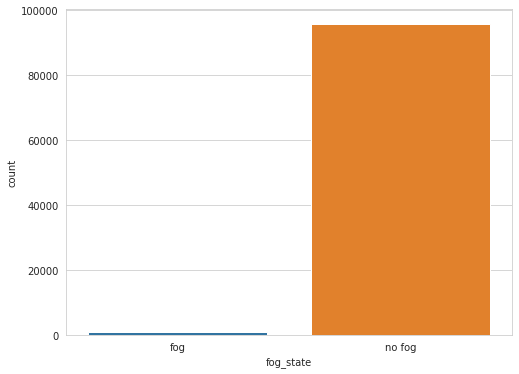

----------------------------------------------------------------------------------------------------
season


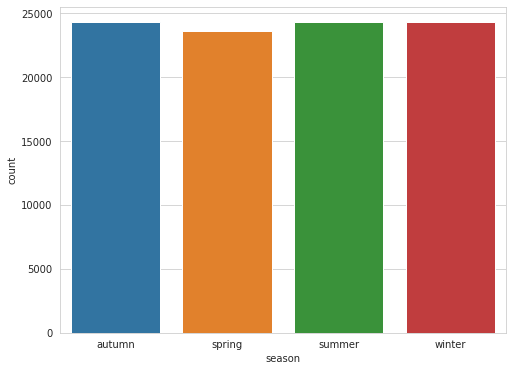

----------------------------------------------------------------------------------------------------
tsig1


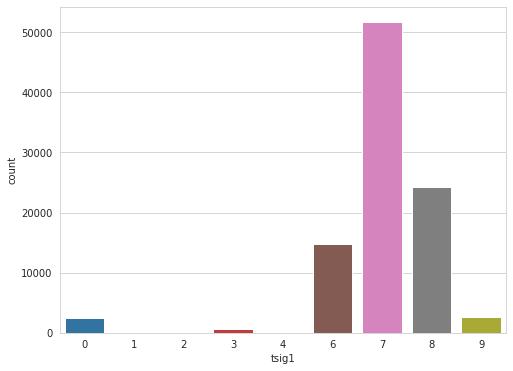

----------------------------------------------------------------------------------------------------
tsig2


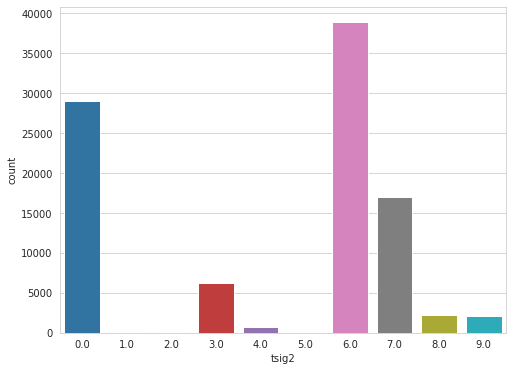

----------------------------------------------------------------------------------------------------
tsig3


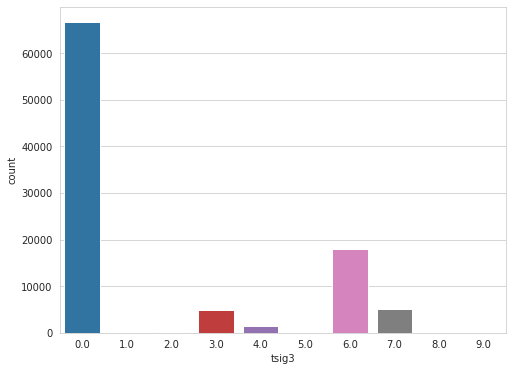

----------------------------------------------------------------------------------------------------
pchar


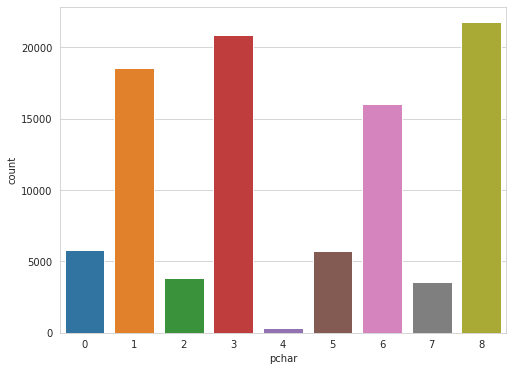

----------------------------------------------------------------------------------------------------
w


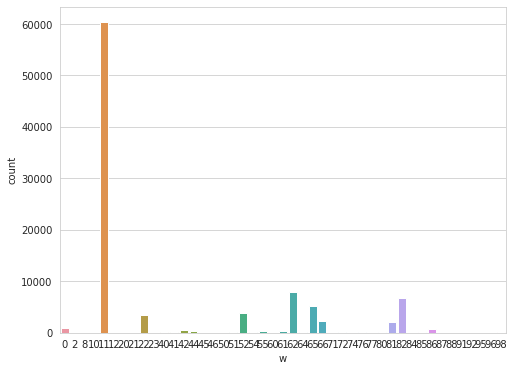

----------------------------------------------------------------------------------------------------
ww


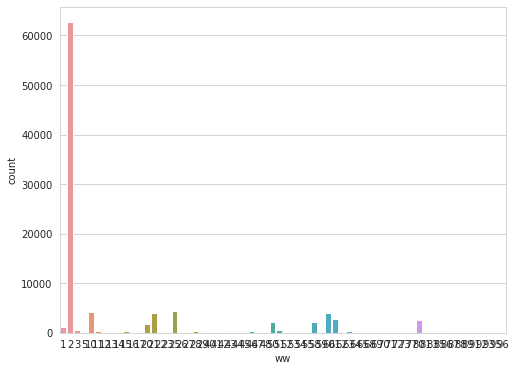

----------------------------------------------------------------------------------------------------
pweather


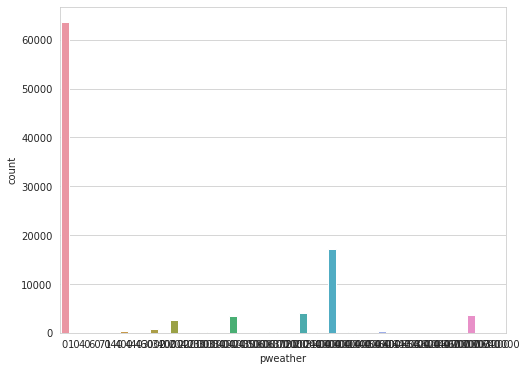

----------------------------------------------------------------------------------------------------
weather


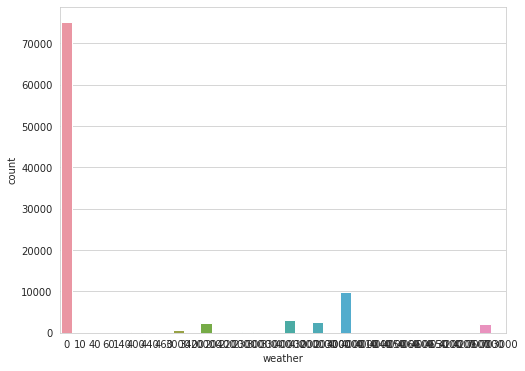

----------------------------------------------------------------------------------------------------


In [ ]:
for var in categorical:
  print(var)
  plot_dist_discrete(var=var, data=df)
  print("-"*100)

- Rainall and sunshine didn't occur in most hours so their distributions are zero-inflated. This distribution shows that if there was rain, it was most likely for the entire hour.

- Sunshine distribution shows a similar trend. Again like rainfall, if there was any sunshine in the hour, it was most likely for the entire hour.

- The rate of zero values in the nsigX variables increases from nsig1 to 4, as was seen in the tsigX values also.

- total amount of cloud in okta is negatively skewed.

clow


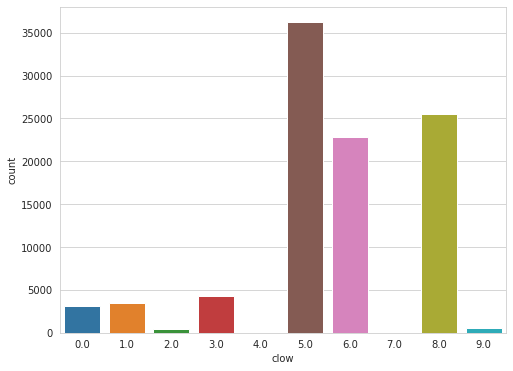

----------------------------------------------------------------------------------------------------
cmedium


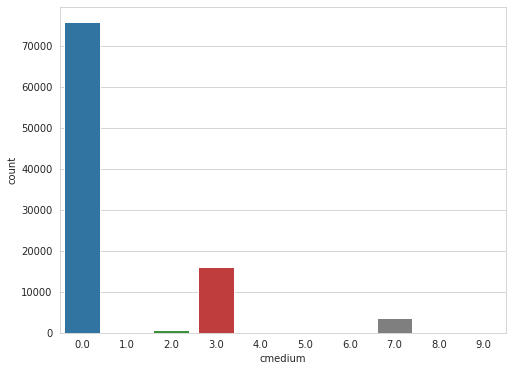

----------------------------------------------------------------------------------------------------
chigh


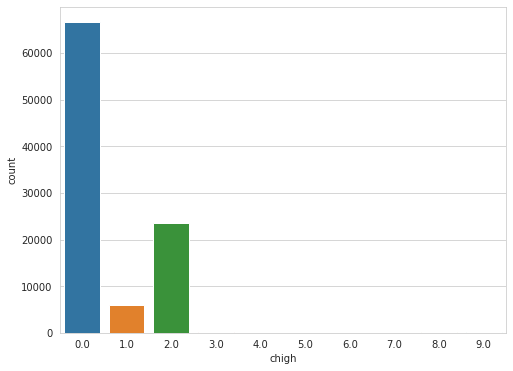

----------------------------------------------------------------------------------------------------
nlc


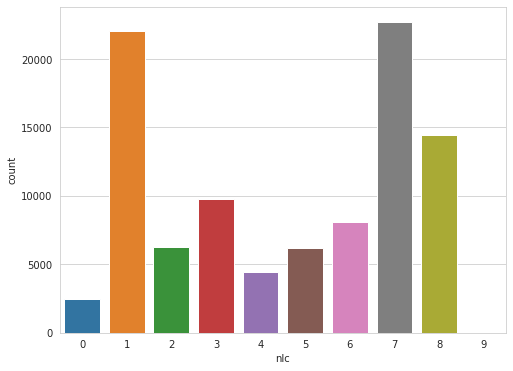

----------------------------------------------------------------------------------------------------
ntot


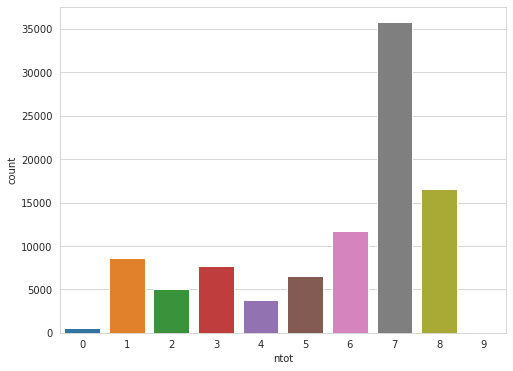

----------------------------------------------------------------------------------------------------
nsig1


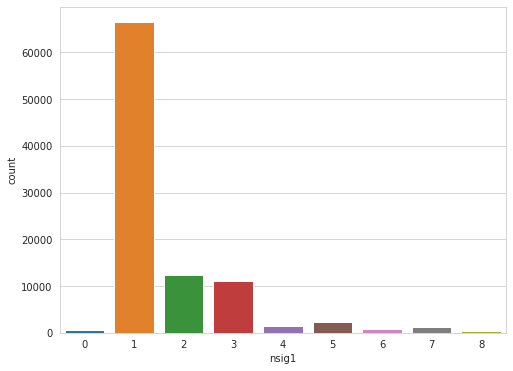

----------------------------------------------------------------------------------------------------
nsig2


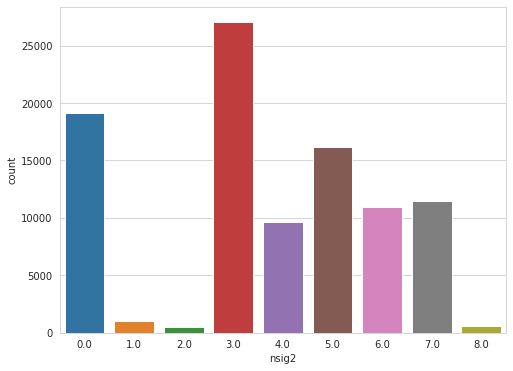

----------------------------------------------------------------------------------------------------
nsig3


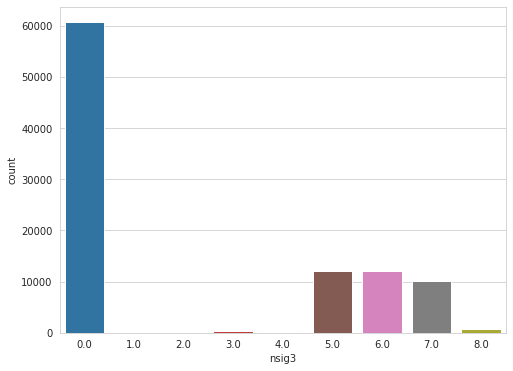

----------------------------------------------------------------------------------------------------
nsig4


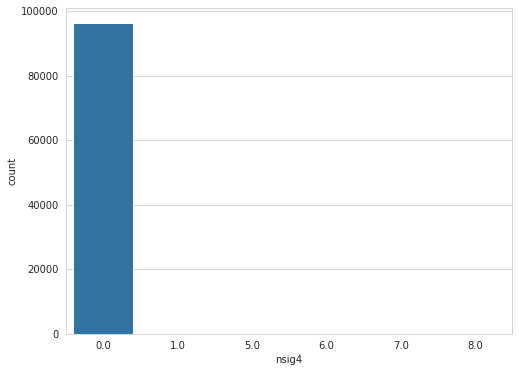

----------------------------------------------------------------------------------------------------
tsig4


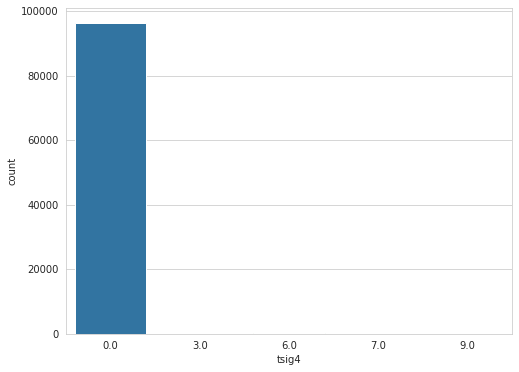

----------------------------------------------------------------------------------------------------
duration


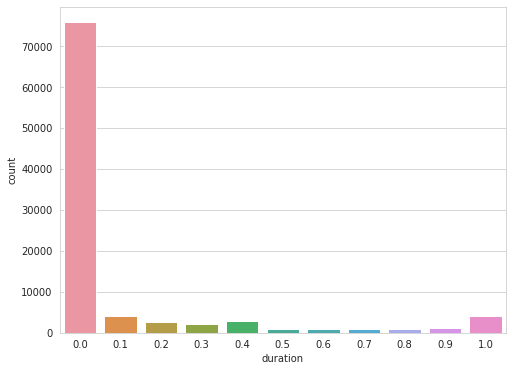

----------------------------------------------------------------------------------------------------
sunshine


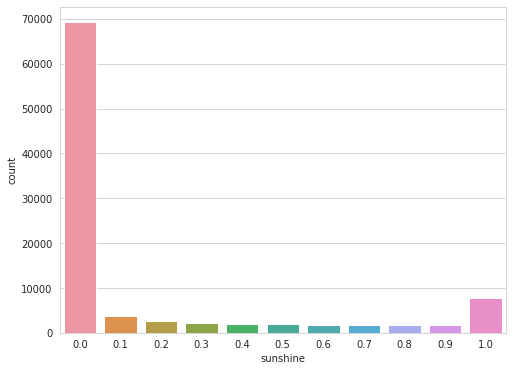

----------------------------------------------------------------------------------------------------


In [ ]:
for var in discrete:
  print(var)
  plot_dist_discrete(var, df)
  print("-"*100)

mean: 9.82
stdev: 4.98
iqr: 7.2


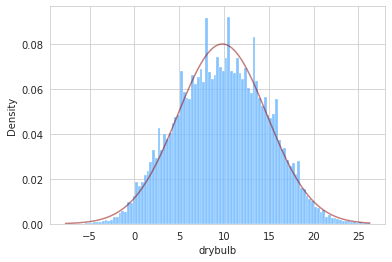

In [ ]:
# parameters for the normal distribution pdf
x_axis = np.linspace(np.min(df.drybulb), np.max(df.drybulb), 100)
s_mean = df.drybulb.mean()
s_stderr = df.drybulb.std()
inter_qr = stats.iqr(df.drybulb)


# plot the distribution of temperature along with the normal PDF for it's sample statistics

sns.histplot(x='drybulb', data=df, stat='density', color='#5fb0ff')
plt.plot(x_axis, stats.norm.pdf(x_axis, s_mean, s_stderr), color='darkred', alpha=0.5)

print("mean:", np.round(s_mean, 2))
print("stdev:", np.round(s_stderr, 2))
print("iqr:", np.round(inter_qr, 2))

plt.show()

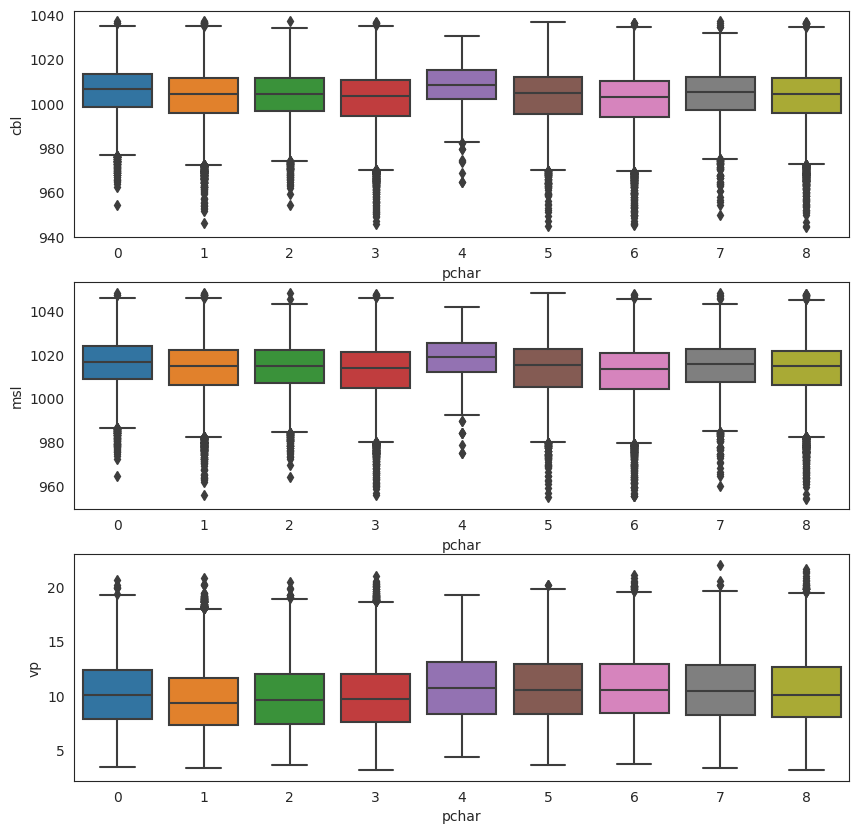

In [ ]:
# how does pressure change according to pchar?
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
sns.boxplot(x='pchar', y='cbl', data=df, ax=axs[0])
sns.boxplot(x='pchar', y='msl', data=df, ax=axs[1])
sns.boxplot(x='pchar', y='vp', data=df, ax=axs[2])

plt.show()

- **Atmospheric pressure is unimodal distribution with a slight left skew**. The same is observed at the mean sea level pressure

- **dew point temperature, wetbulb, and drybulb temperatures are also unimodal with not much skew**. The pressure variables shows more kurtosis than temperature variables

- Observed temperatures in Ireland follow a normal distribution

- **Cloud ceiling heights are right skewed, but many non-values were reported**. In fact, 24% of observations had a missing ceiling value. We do not have clear skies in Ireland a quarter of the time, so not all of these missings can relate to no present cloud ceiling.

- **Height of low cloud is also right skewed**, with lower values than the ceiling as expected. But no missing values here. The same information is captured by hsig1 and hlc.

- height of Xth cloud layer have more zero-values progressively from X=1 to X=4. This is most likely due to no observed Xth cloud layer. Almost always a first layer, less often a second layer, and so on.

- Observed wind direction not uniform. Wind direction tends to be influenced by large-scale atmospheric circulation patterns and the local topography. Such as mountains, buildings, and valleys.


dir


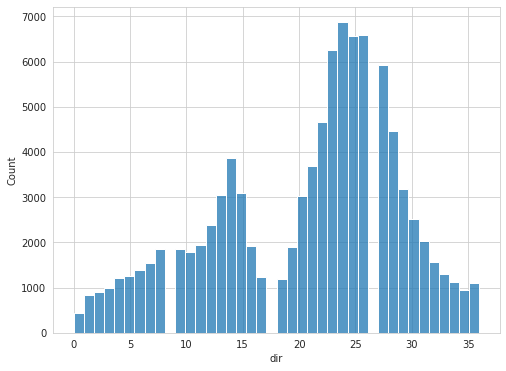

----------------------------------------------------------------------------------------------------
speed


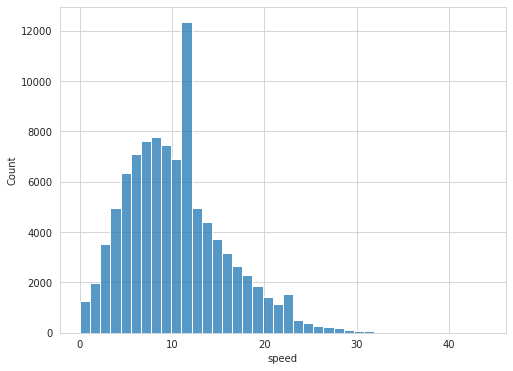

----------------------------------------------------------------------------------------------------
vis


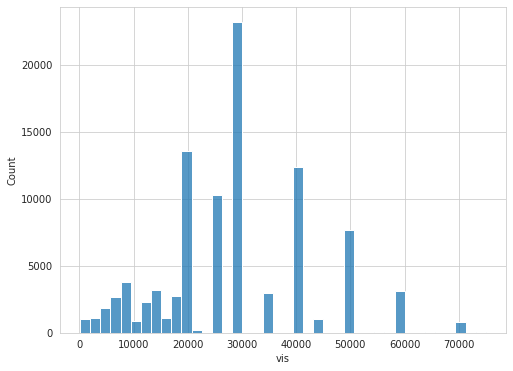

----------------------------------------------------------------------------------------------------
ptend


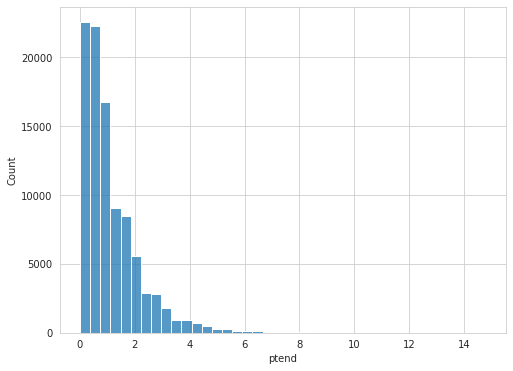

----------------------------------------------------------------------------------------------------
cbl


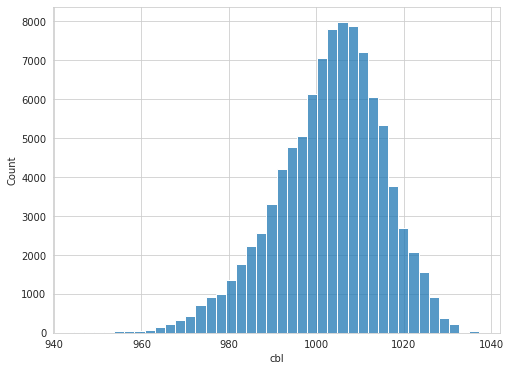

----------------------------------------------------------------------------------------------------
msl


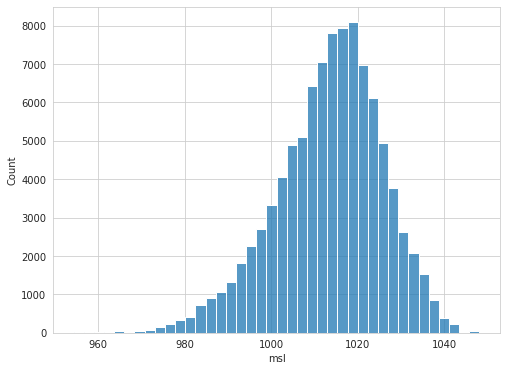

----------------------------------------------------------------------------------------------------
drybulb


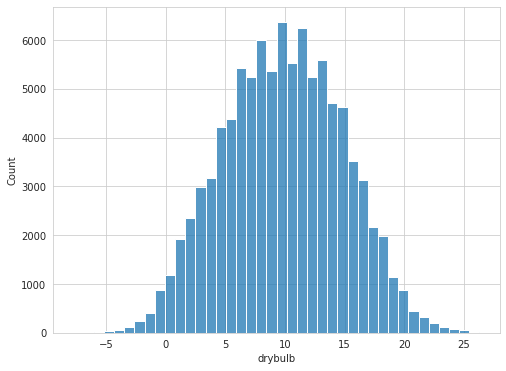

----------------------------------------------------------------------------------------------------
wetbulb


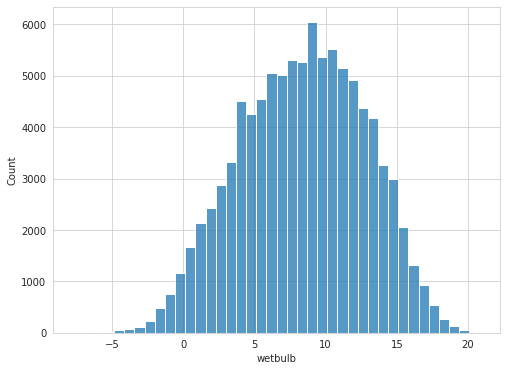

----------------------------------------------------------------------------------------------------
dewpt


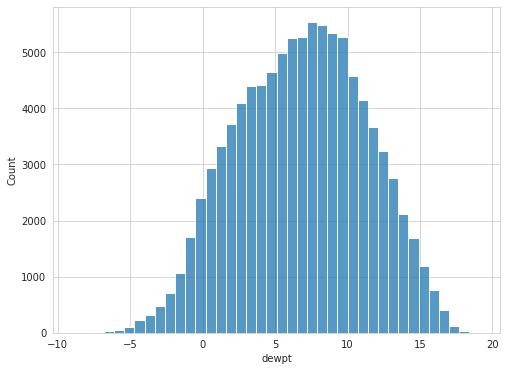

----------------------------------------------------------------------------------------------------
vp


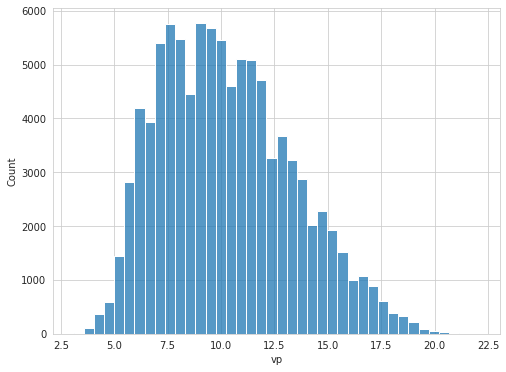

----------------------------------------------------------------------------------------------------
rh


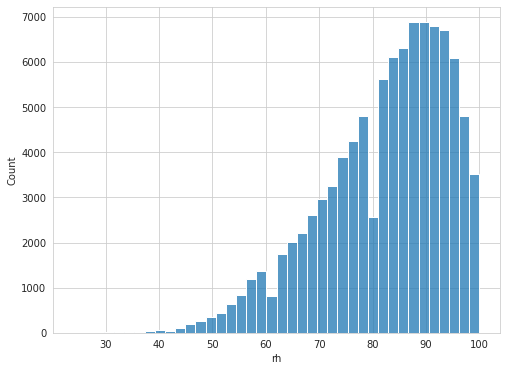

----------------------------------------------------------------------------------------------------
hlc


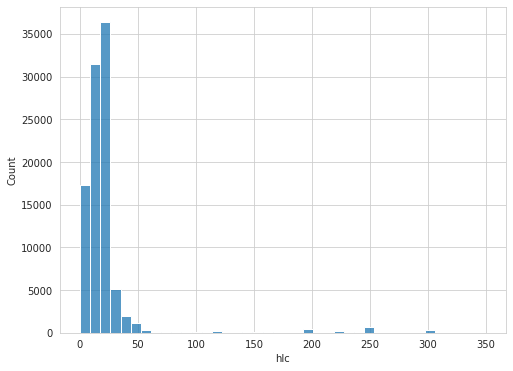

----------------------------------------------------------------------------------------------------
hsig1


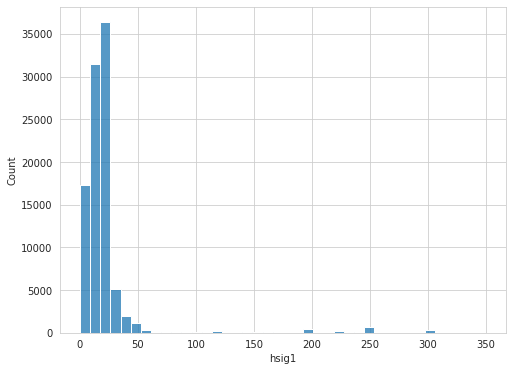

----------------------------------------------------------------------------------------------------
hsig2


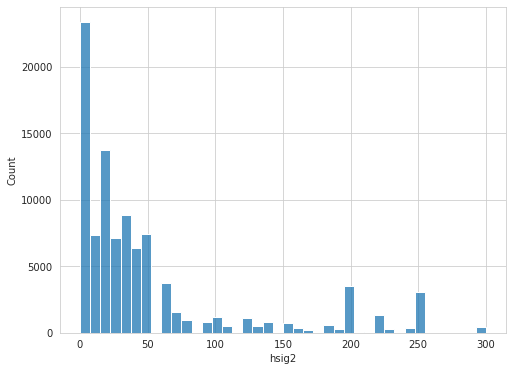

----------------------------------------------------------------------------------------------------
hsig3


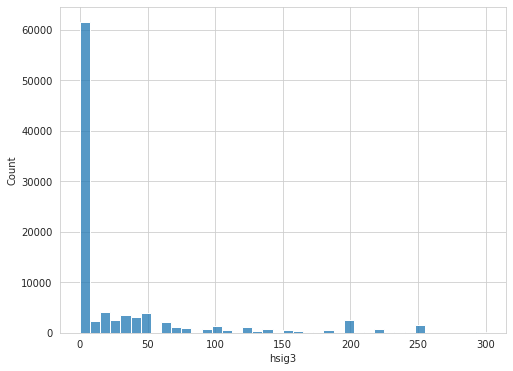

----------------------------------------------------------------------------------------------------
hsig4


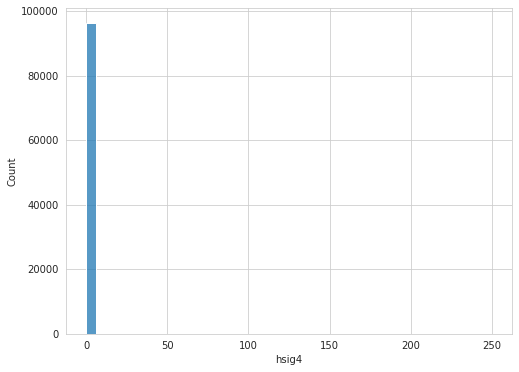

----------------------------------------------------------------------------------------------------
ceiling


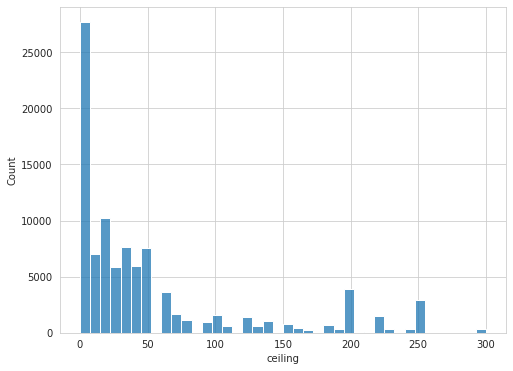

----------------------------------------------------------------------------------------------------
dos


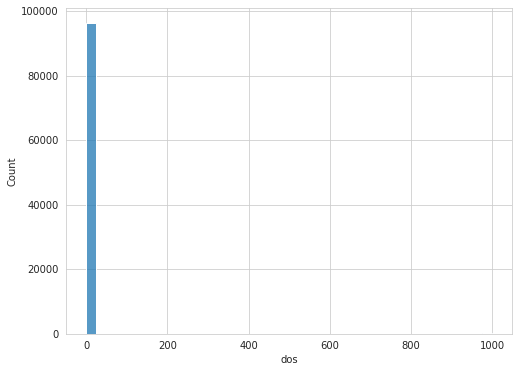

----------------------------------------------------------------------------------------------------
rainfall


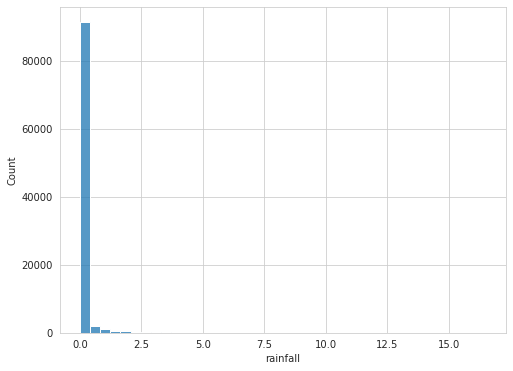

----------------------------------------------------------------------------------------------------
tabdir


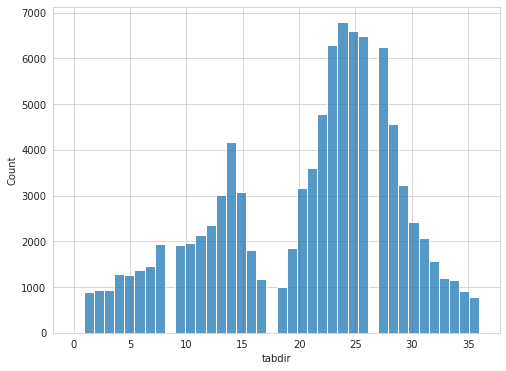

----------------------------------------------------------------------------------------------------
tabspeed


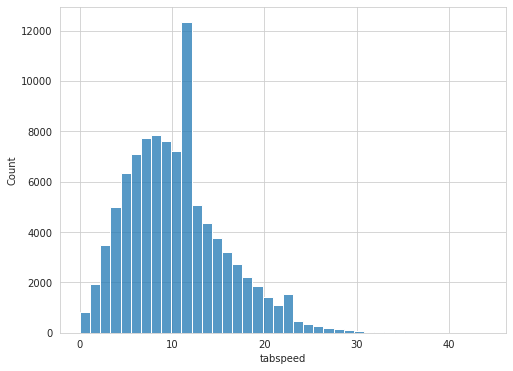

----------------------------------------------------------------------------------------------------
dni


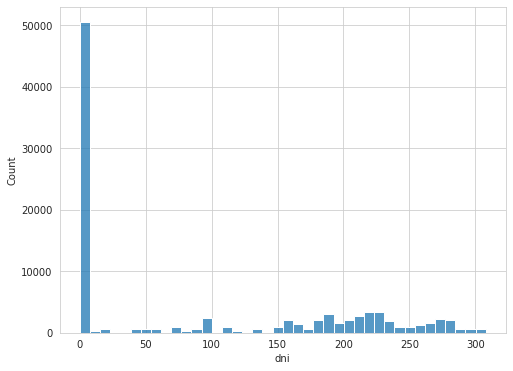

----------------------------------------------------------------------------------------------------
temp_dew_dist


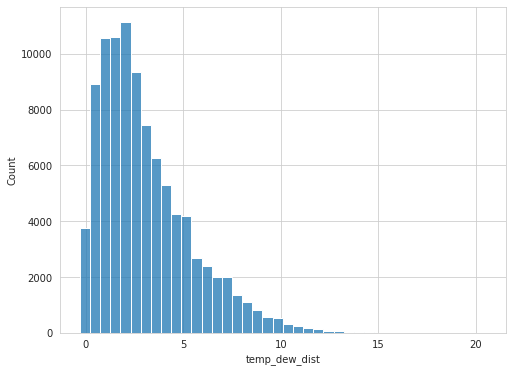

----------------------------------------------------------------------------------------------------
rainfall12hma


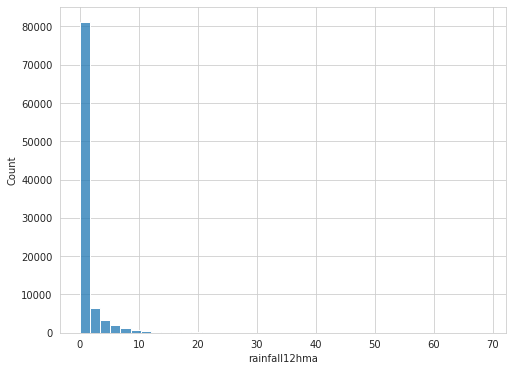

----------------------------------------------------------------------------------------------------


In [ ]:
for var in continuous:
  print(var)
  plot_dist_continuous(var, df, bins=40)
  print("-"*100)

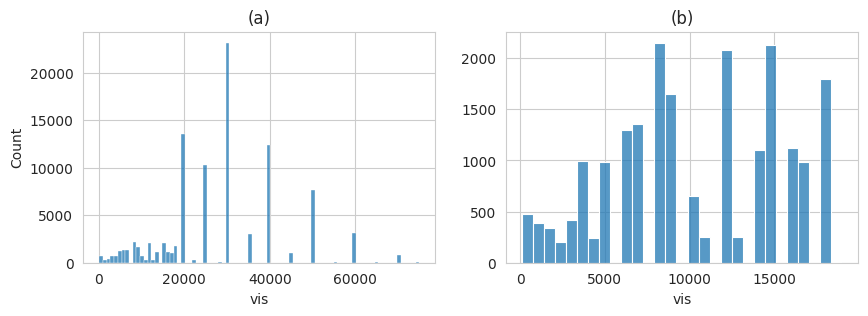

In [ ]:
with sns.axes_style("whitegrid"):
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(df.vis, ax = axs[0])
    sns.histplot(df.vis.loc[df.vis < 20000], ax = axs[1])

    axs[0].set(title='(a)')
    axs[1].set(title='(b)', ylabel=None)

plt.show()

### Distributions by target class

In [ ]:
len(continuous)

24

dir


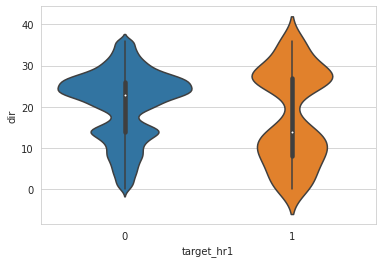

----------------------------------------------------------------------------------------------------
speed


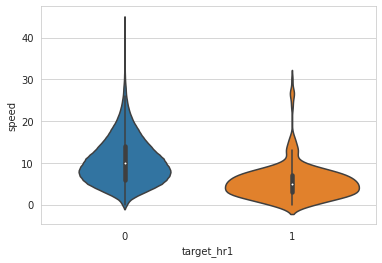

----------------------------------------------------------------------------------------------------
vis


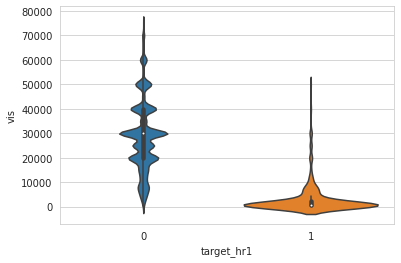

----------------------------------------------------------------------------------------------------
ptend


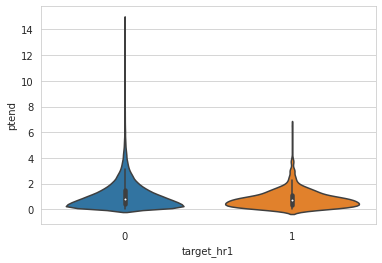

----------------------------------------------------------------------------------------------------
cbl


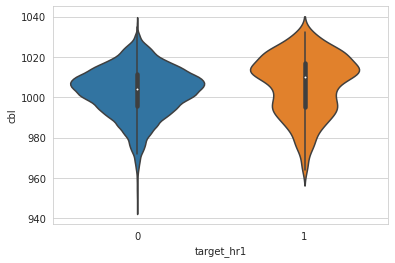

----------------------------------------------------------------------------------------------------
msl


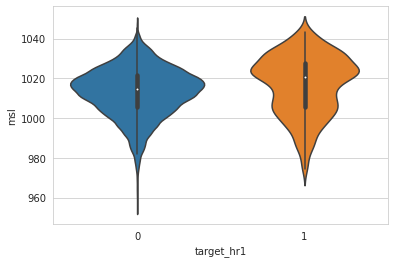

----------------------------------------------------------------------------------------------------
drybulb


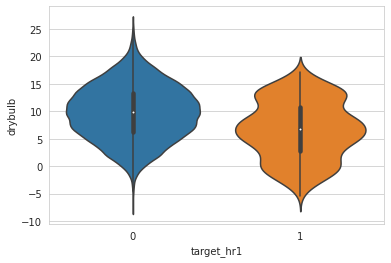

----------------------------------------------------------------------------------------------------
wetbulb


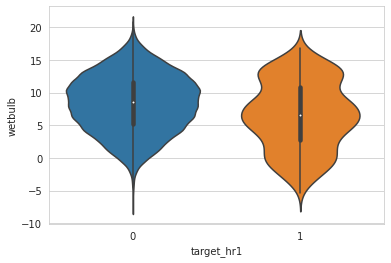

----------------------------------------------------------------------------------------------------
dewpt


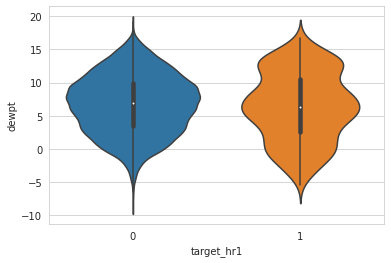

----------------------------------------------------------------------------------------------------
vp


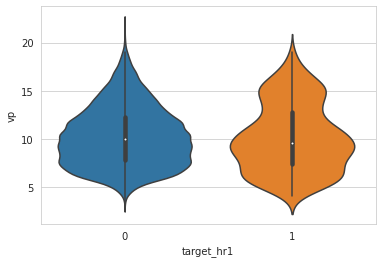

----------------------------------------------------------------------------------------------------
rh


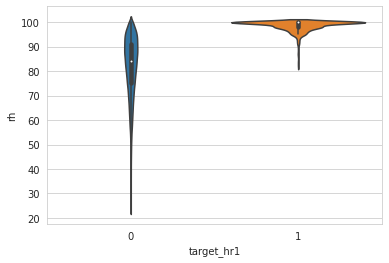

----------------------------------------------------------------------------------------------------
hlc


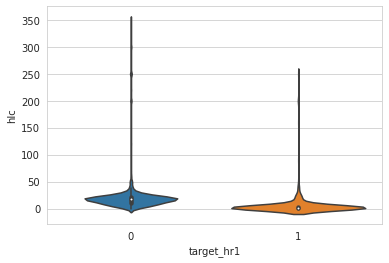

----------------------------------------------------------------------------------------------------
hsig1


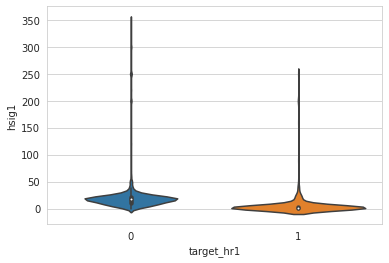

----------------------------------------------------------------------------------------------------
hsig2


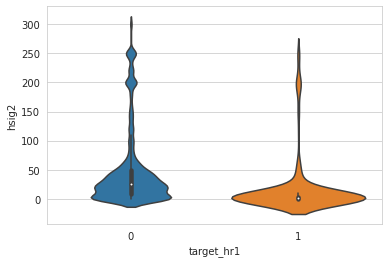

----------------------------------------------------------------------------------------------------
hsig3


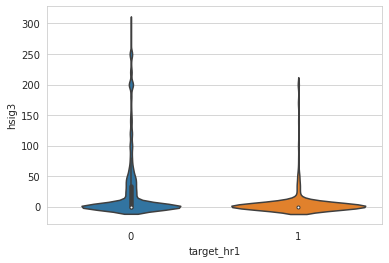

----------------------------------------------------------------------------------------------------
hsig4


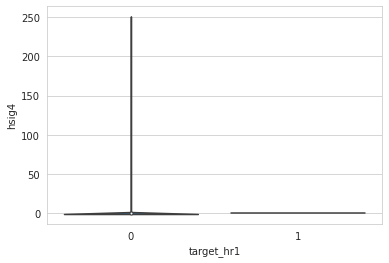

----------------------------------------------------------------------------------------------------
ceiling


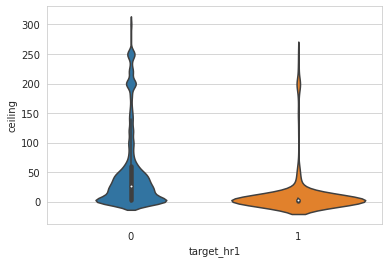

----------------------------------------------------------------------------------------------------
dos


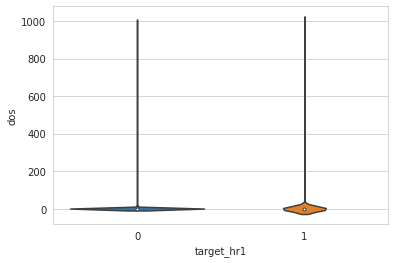

----------------------------------------------------------------------------------------------------
rainfall


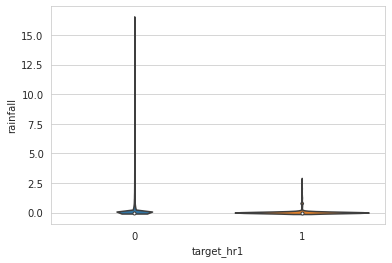

----------------------------------------------------------------------------------------------------
tabdir


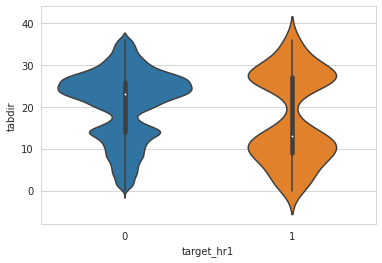

----------------------------------------------------------------------------------------------------
tabspeed


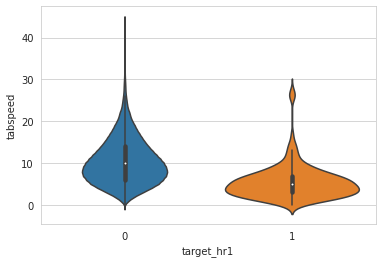

----------------------------------------------------------------------------------------------------
dni


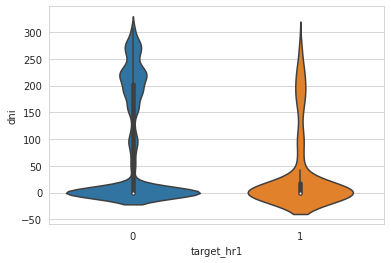

----------------------------------------------------------------------------------------------------
temp_dew_dist


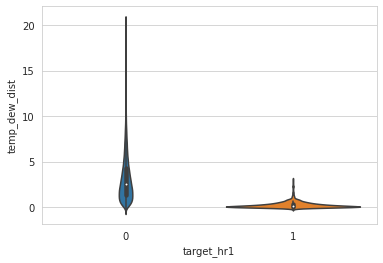

----------------------------------------------------------------------------------------------------
rainfall12hma


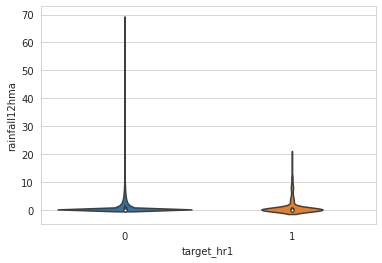

----------------------------------------------------------------------------------------------------


In [ ]:
for var in continuous:
  print(var)
  plt.figure()
  sns.violinplot(x=target, y=var, data=df)
  plt.show()
  print("-"*100)

clow


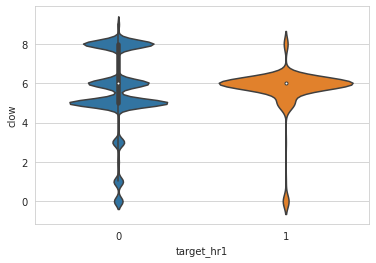

----------------------------------------------------------------------------------------------------
cmedium


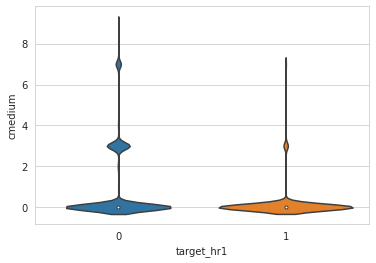

----------------------------------------------------------------------------------------------------
chigh


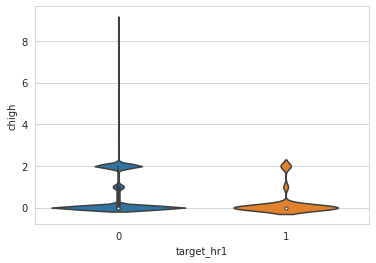

----------------------------------------------------------------------------------------------------
nlc


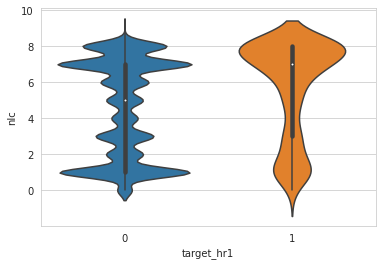

----------------------------------------------------------------------------------------------------
ntot


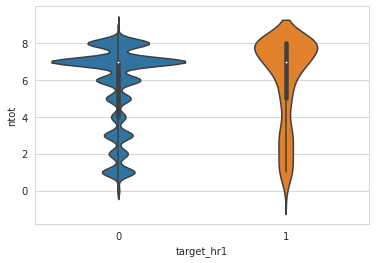

----------------------------------------------------------------------------------------------------
nsig1


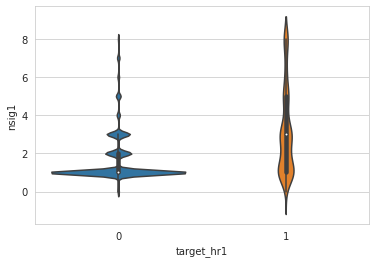

----------------------------------------------------------------------------------------------------
nsig2


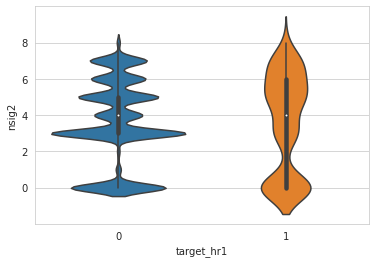

----------------------------------------------------------------------------------------------------
nsig3


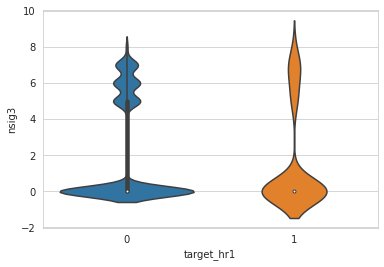

----------------------------------------------------------------------------------------------------
nsig4


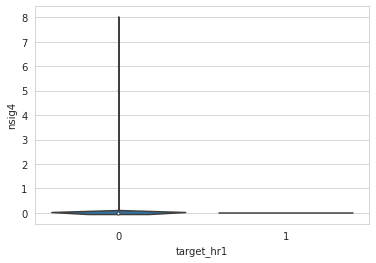

----------------------------------------------------------------------------------------------------
tsig4


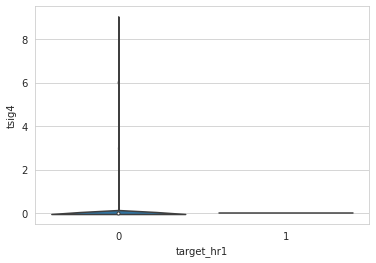

----------------------------------------------------------------------------------------------------
duration


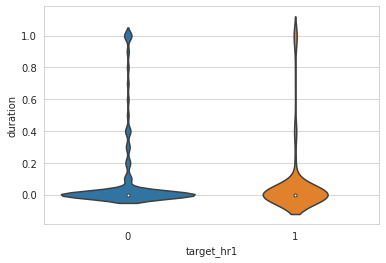

----------------------------------------------------------------------------------------------------
sunshine


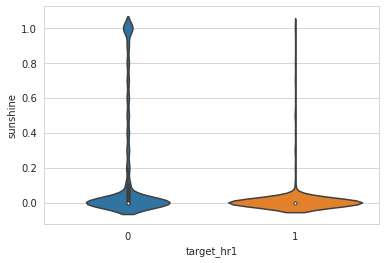

----------------------------------------------------------------------------------------------------


In [ ]:
for var in discrete:
  print(var)
  plt.figure()
  sns.violinplot(x=target, y=var, data=df)
  plt.show()
  print("-"*100)

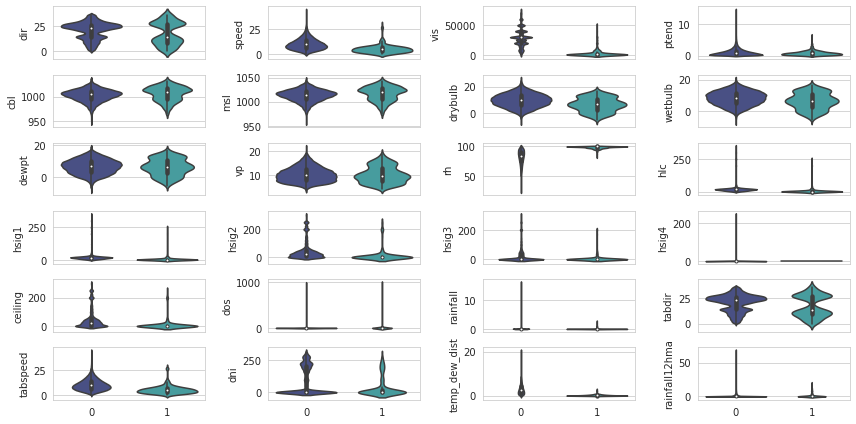

In [ ]:
fig, axs = plt.subplots(6, 4, figsize=(12, 6), sharex=True)

count = 0
for i in range(6):
  for j in range(4):
    sns.violinplot(x=target, y=continuous[count], data=df, ax=axs[i, j], palette='mako')
    axs[i, j].set_xlabel(None)
    count += 1

plt.tight_layout()
plt.show()

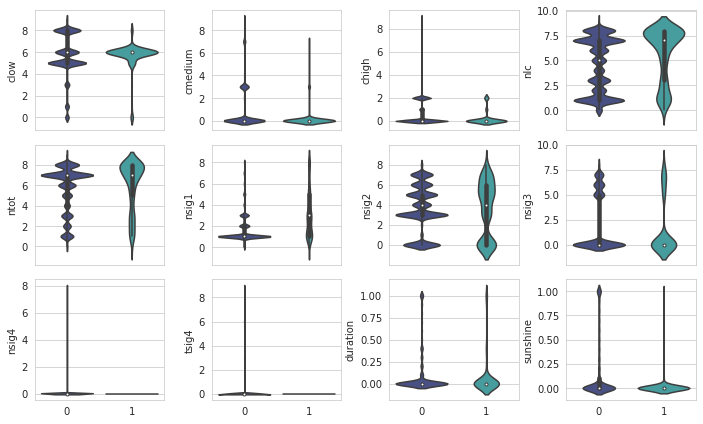

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(10, 6), sharex=True)

count = 0
for i in range(3):
  for j in range(4):
    sns.violinplot(x=target, y=discrete[count], data=df, ax=axs[i, j], palette='mako')
    axs[i, j].set_xlabel(None)
    count += 1

plt.tight_layout()
plt.show()

### Distributions by month

Distribution of each variable by month, shows the seasonal variations in weather conditions.


In [ ]:
df.groupby('month').agg(n_fog=('vis', lambda x: sum(x < 1000)),
                        n_non_fog=('vis', lambda x: sum(x >= 1000))).T

month        1     2     3     4     5     6     7     8     9     10    11    12
n_fog        55    69   122    53    24    43    20    81    72    60    90    55
n_non_fog  8129  7395  8062  7867  8160  7877  8164  8103  7848  8124  7830  8129

dir


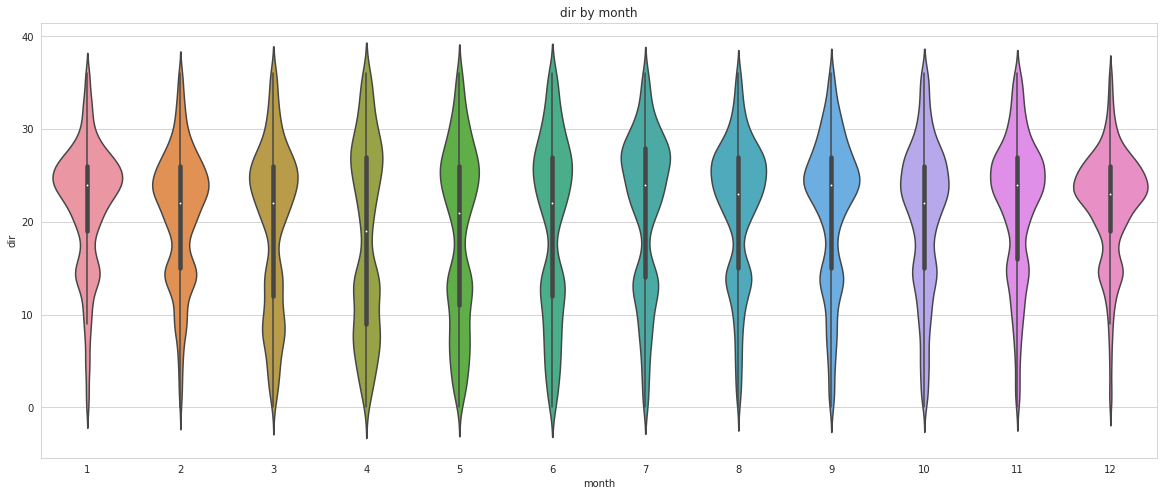

----------------------------------------------------------------------------------------------------
speed


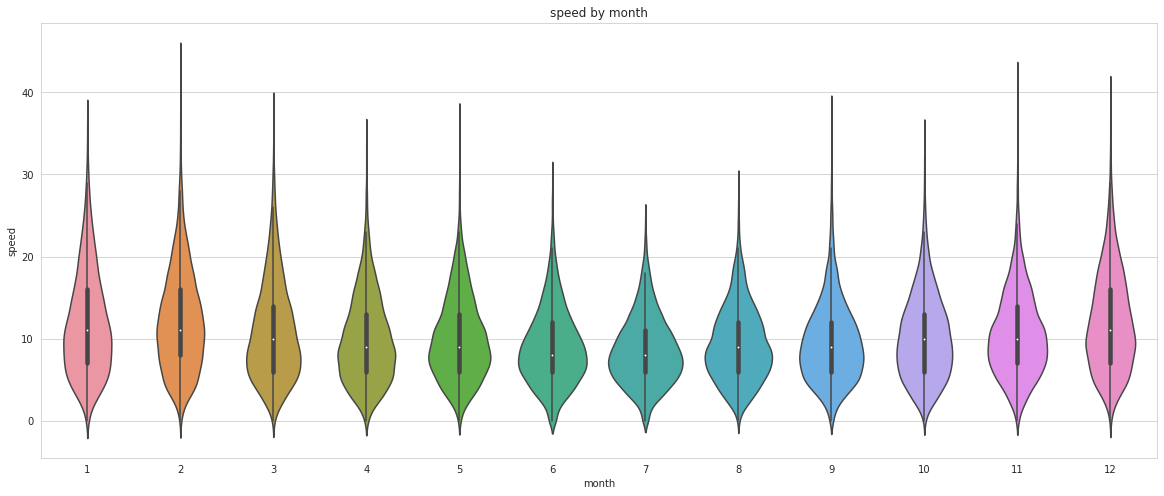

----------------------------------------------------------------------------------------------------
vis


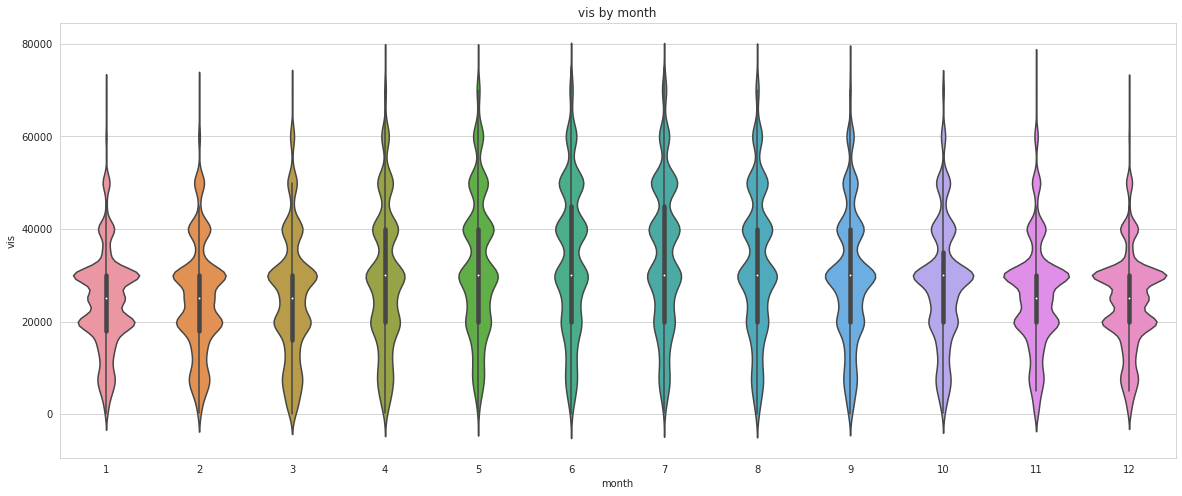

----------------------------------------------------------------------------------------------------
ptend


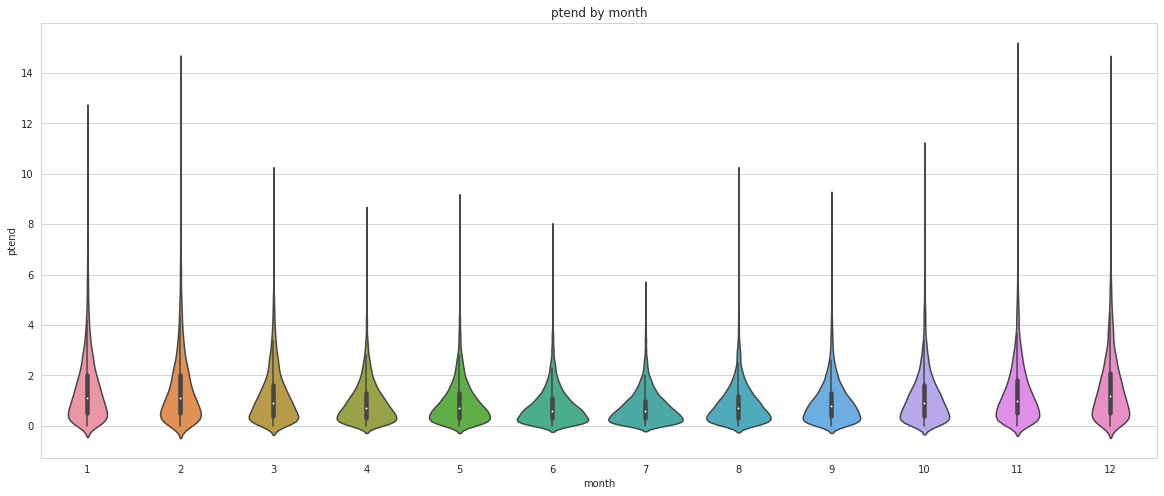

----------------------------------------------------------------------------------------------------
cbl


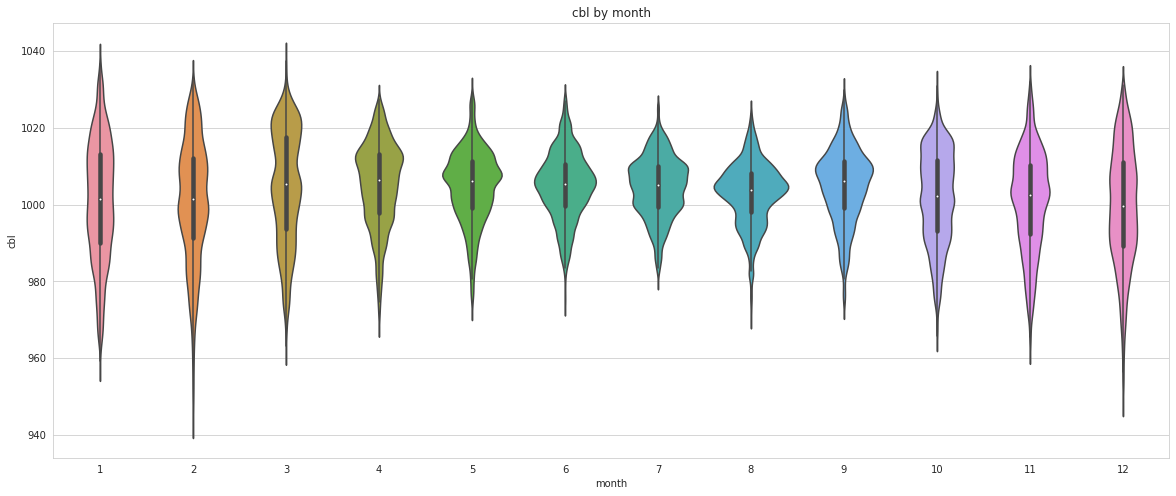

----------------------------------------------------------------------------------------------------
msl


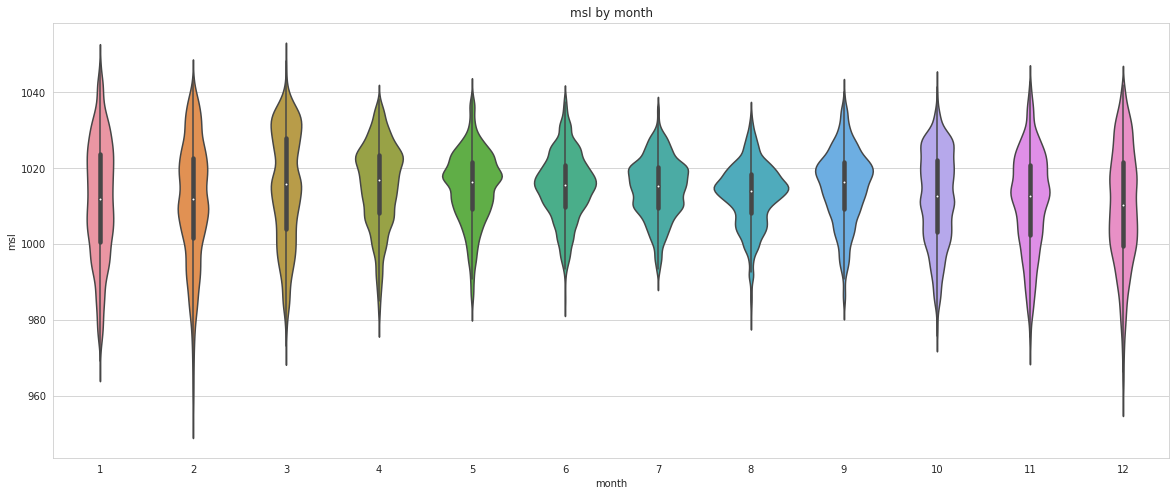

----------------------------------------------------------------------------------------------------
drybulb


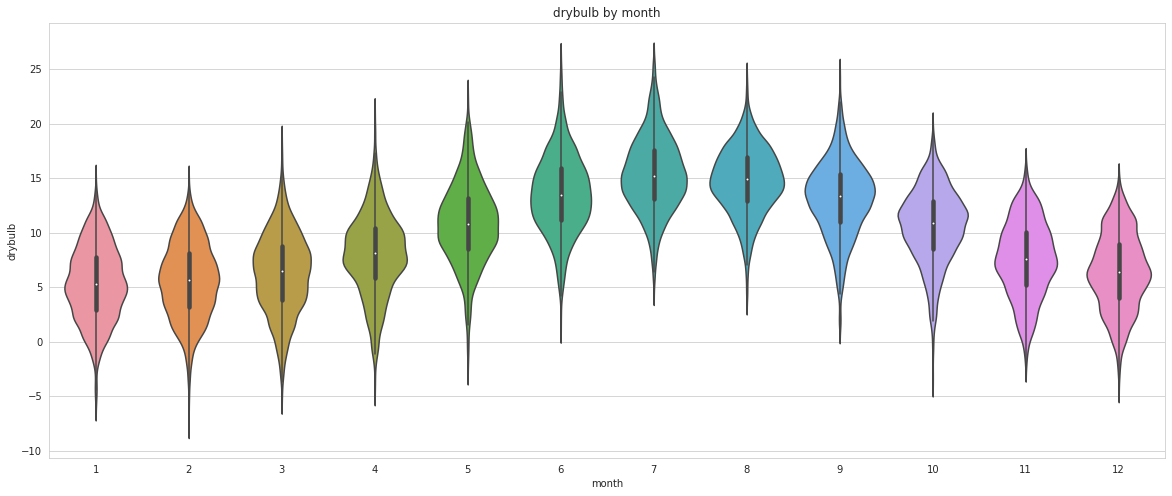

----------------------------------------------------------------------------------------------------
wetbulb


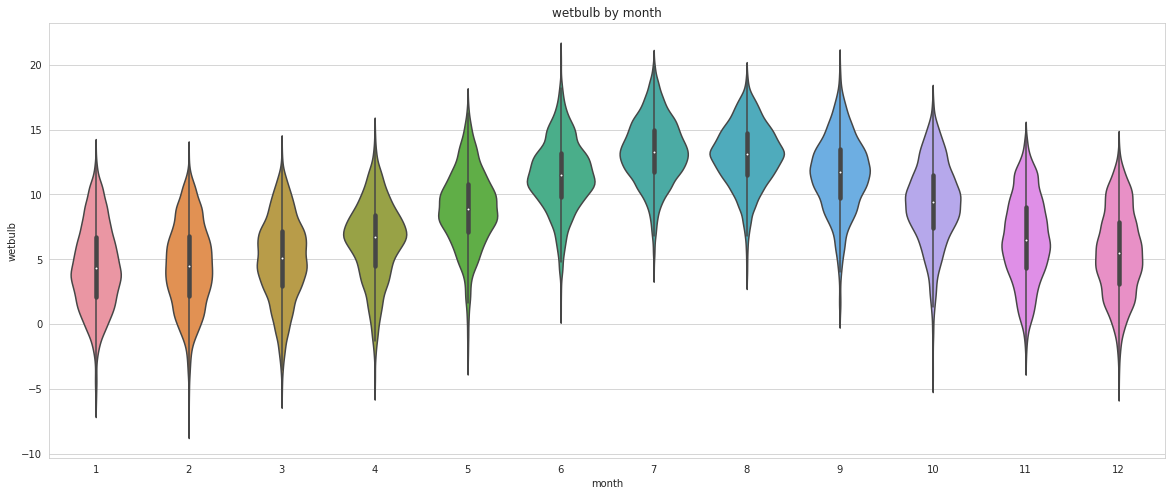

----------------------------------------------------------------------------------------------------
dewpt


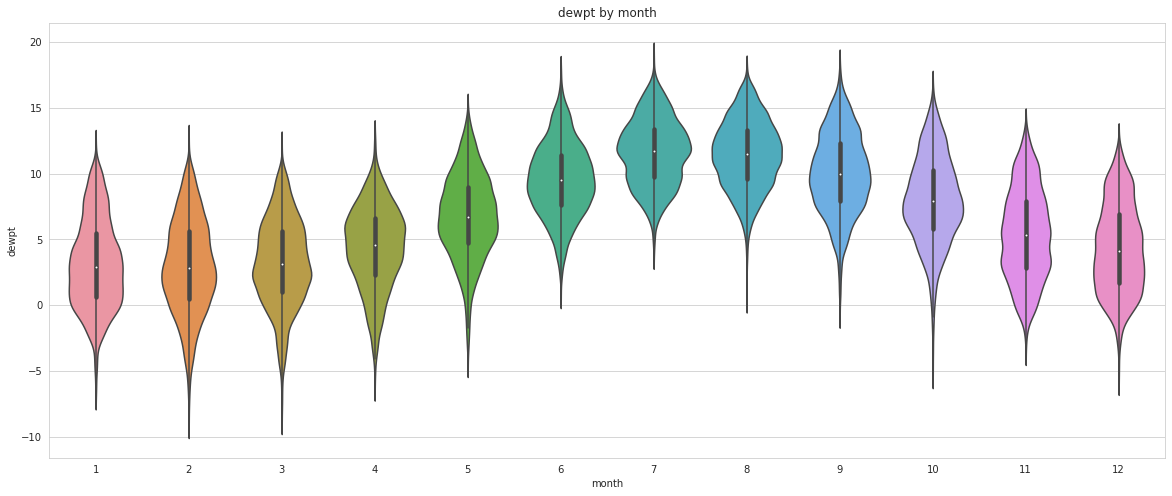

----------------------------------------------------------------------------------------------------
vp


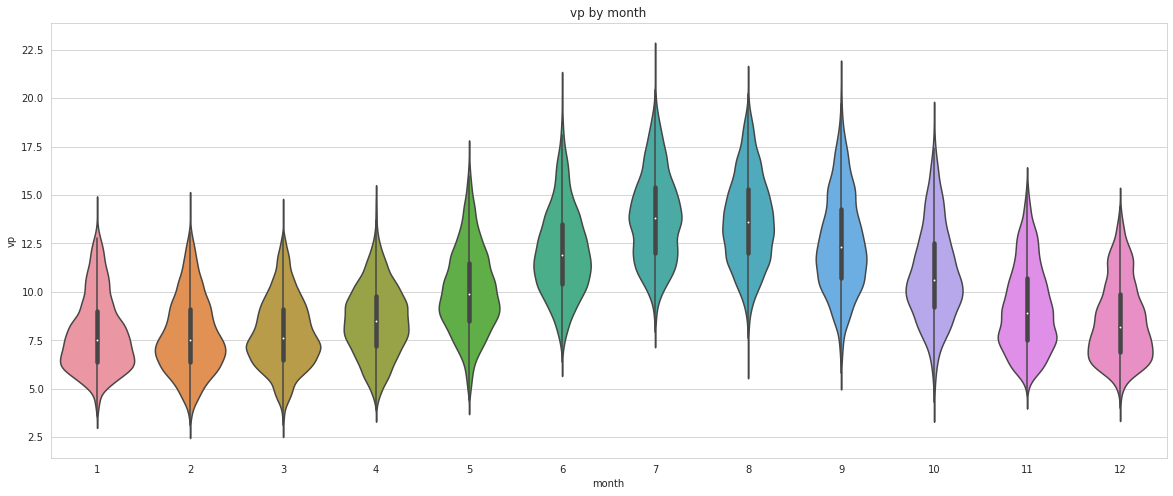

----------------------------------------------------------------------------------------------------
rh


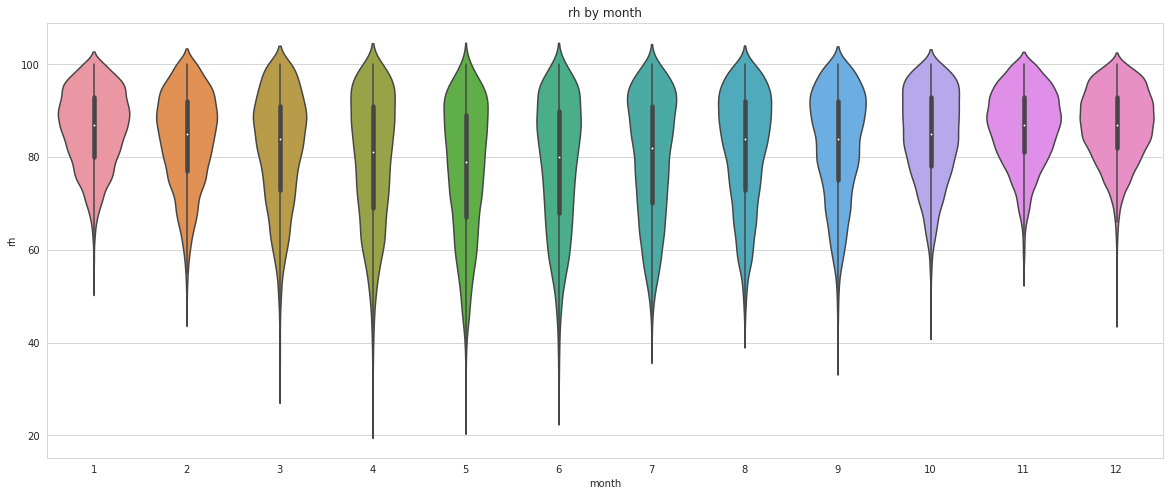

----------------------------------------------------------------------------------------------------
hlc


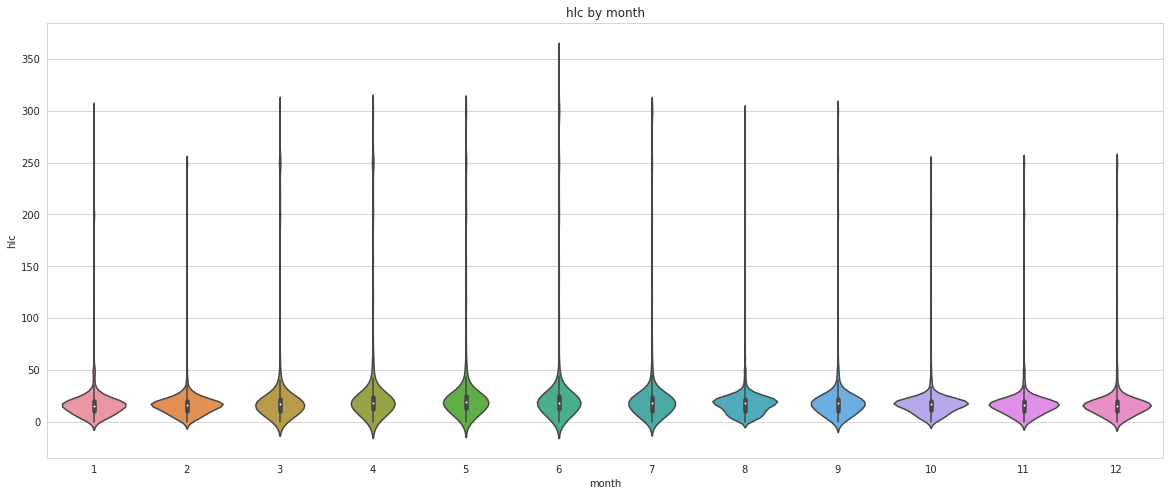

----------------------------------------------------------------------------------------------------
hsig1


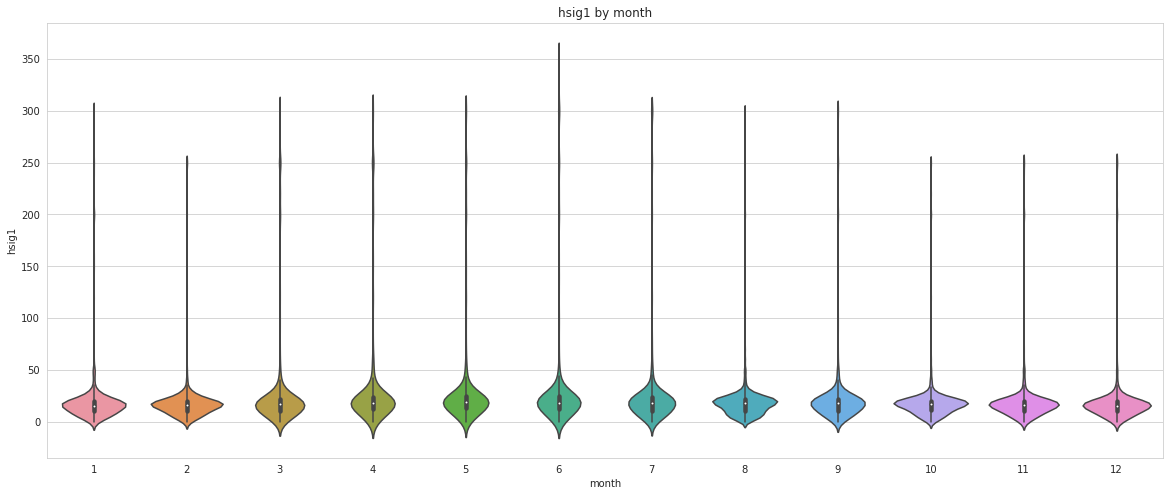

----------------------------------------------------------------------------------------------------
hsig2


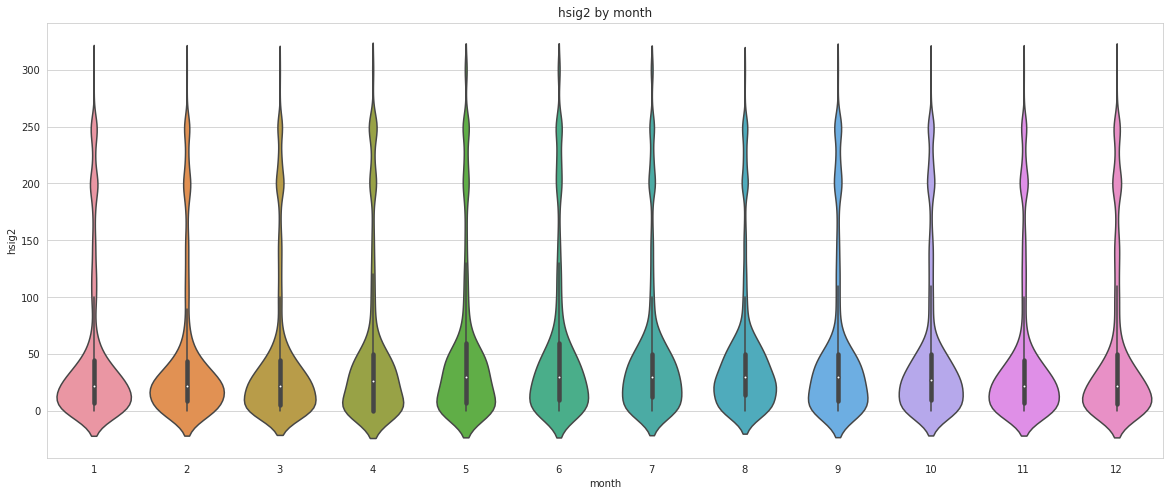

----------------------------------------------------------------------------------------------------
hsig3


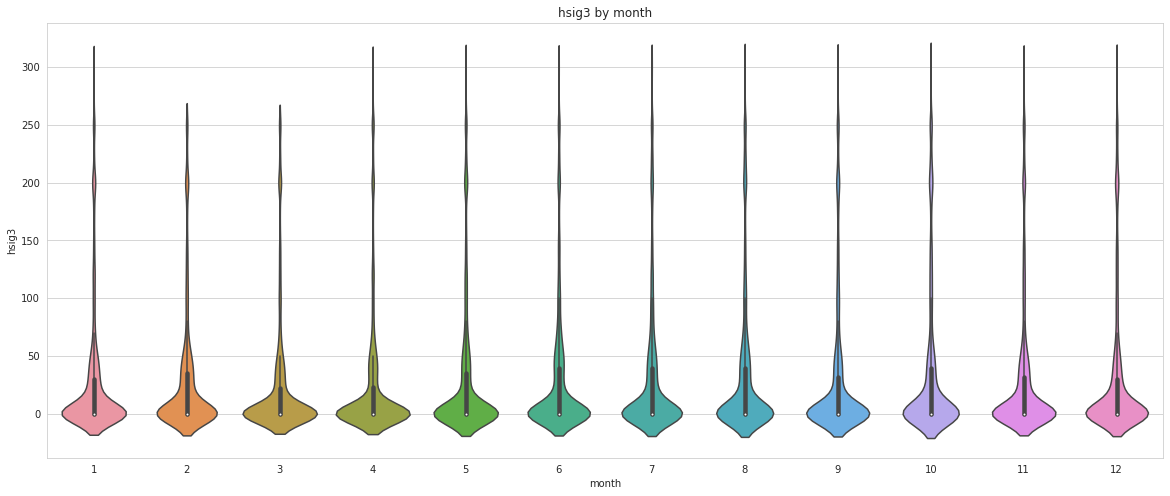

----------------------------------------------------------------------------------------------------
hsig4


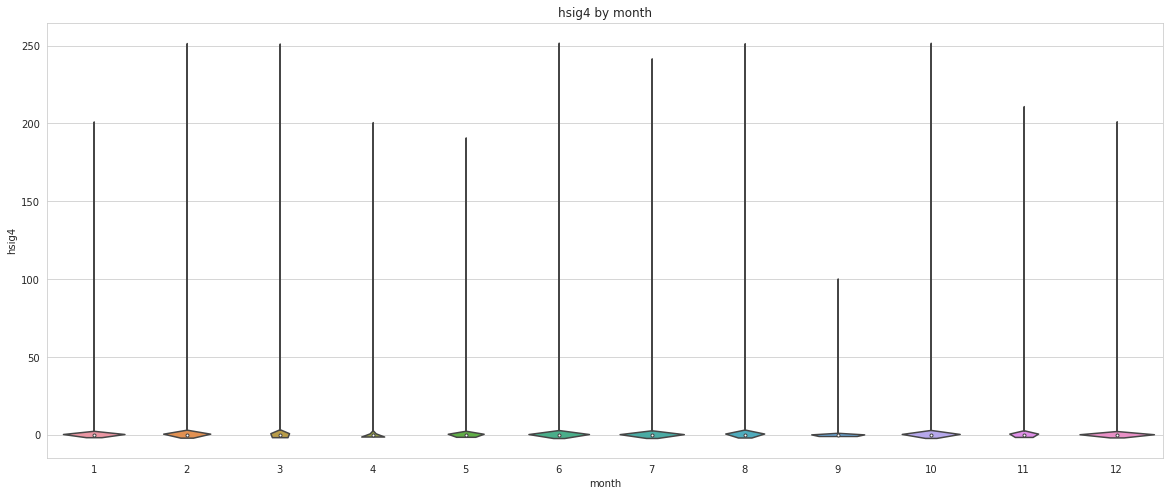

----------------------------------------------------------------------------------------------------
ceiling


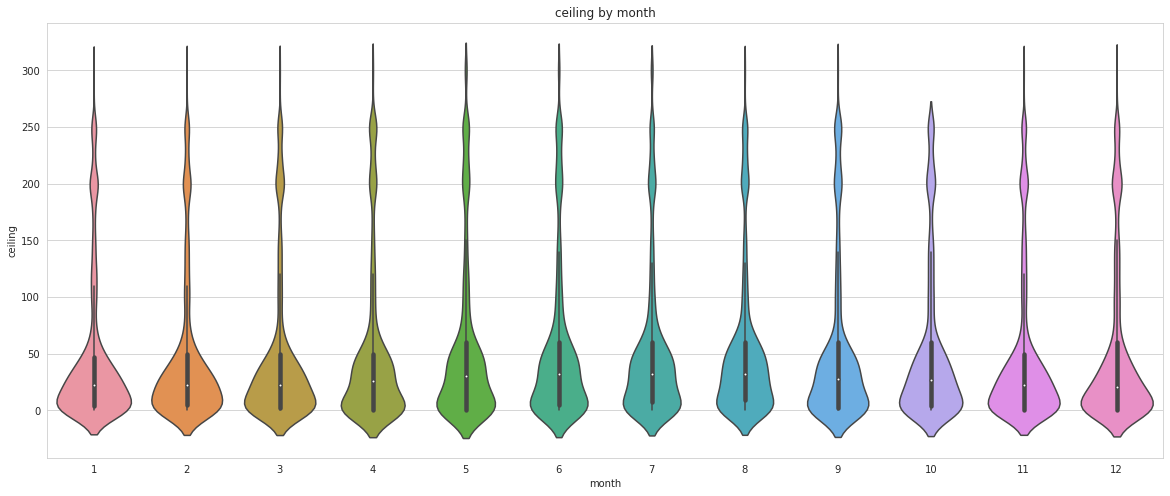

----------------------------------------------------------------------------------------------------
dos


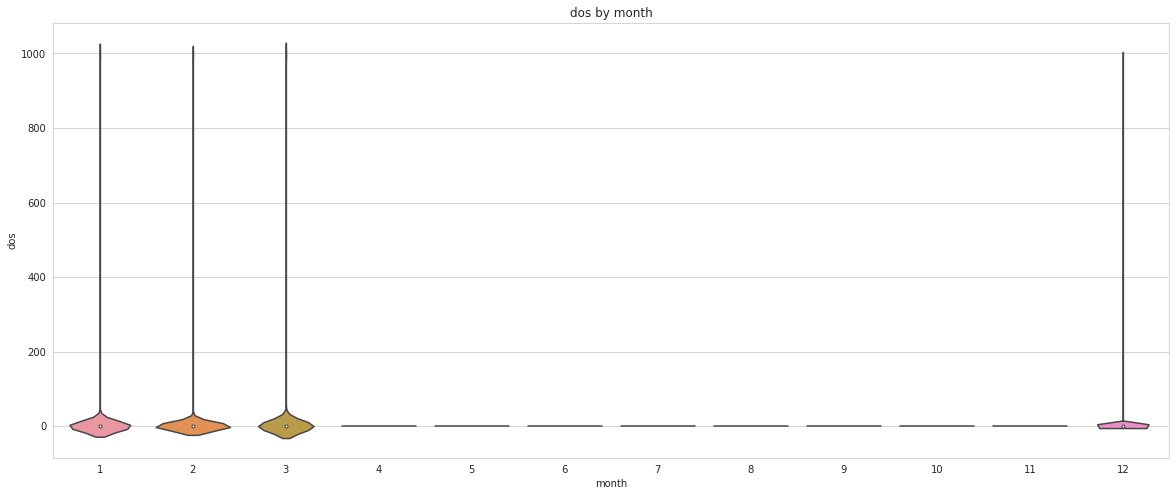

----------------------------------------------------------------------------------------------------
rainfall


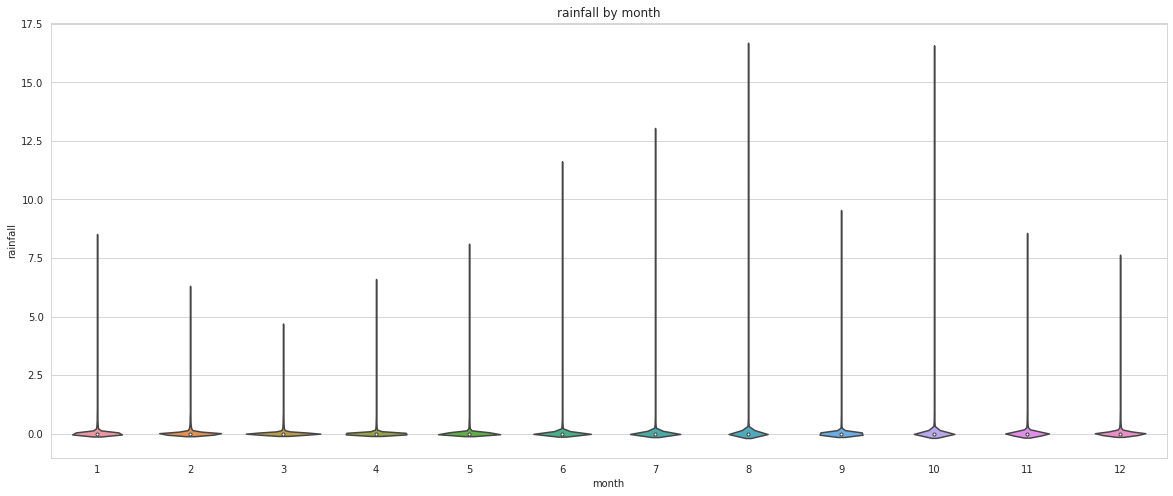

----------------------------------------------------------------------------------------------------
tabdir


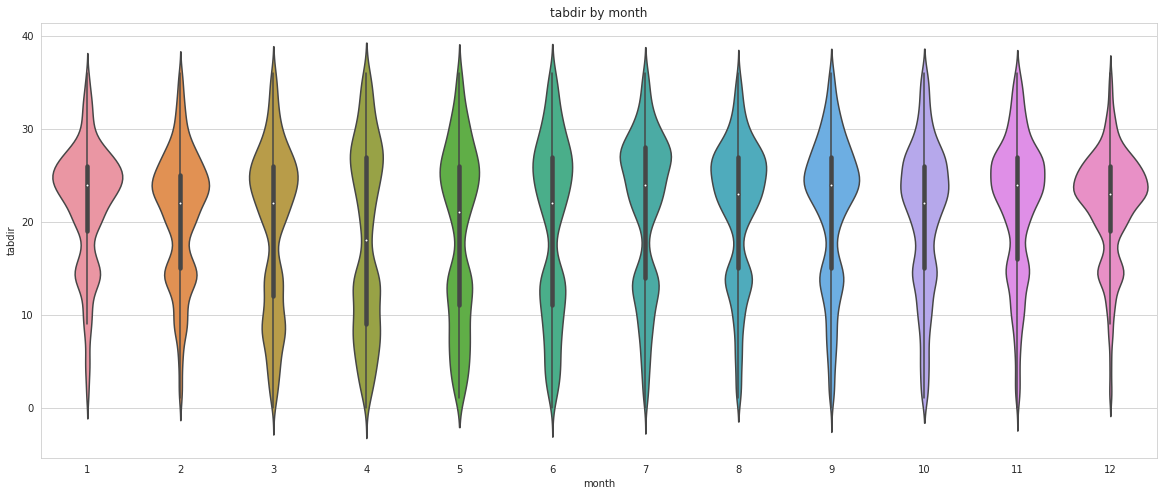

----------------------------------------------------------------------------------------------------
tabspeed


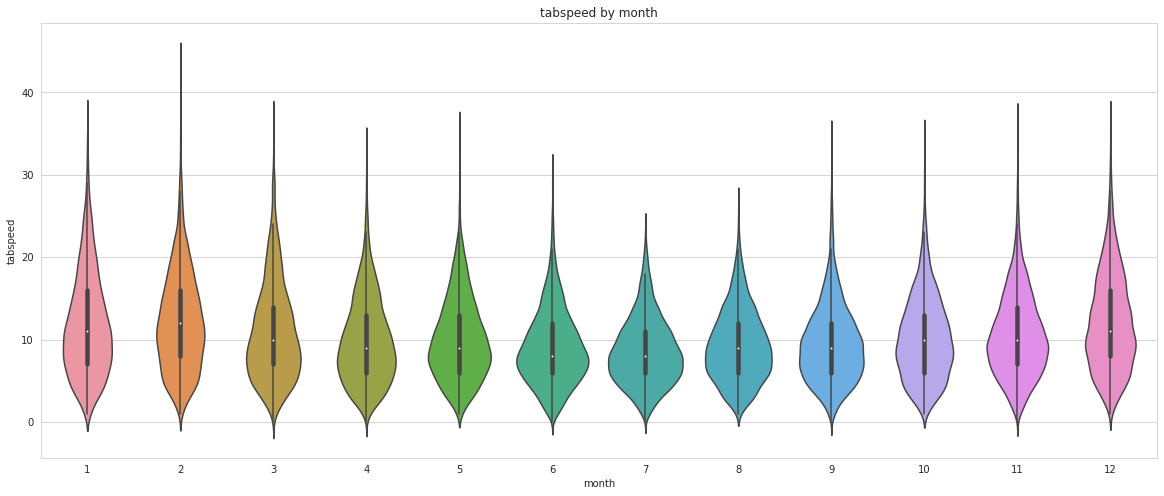

----------------------------------------------------------------------------------------------------
dni


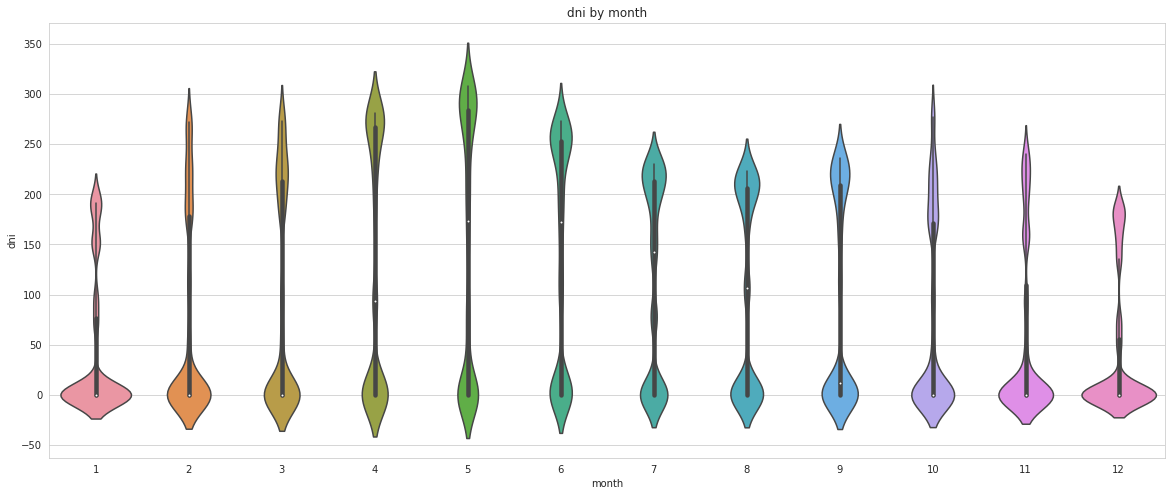

----------------------------------------------------------------------------------------------------
temp_dew_dist


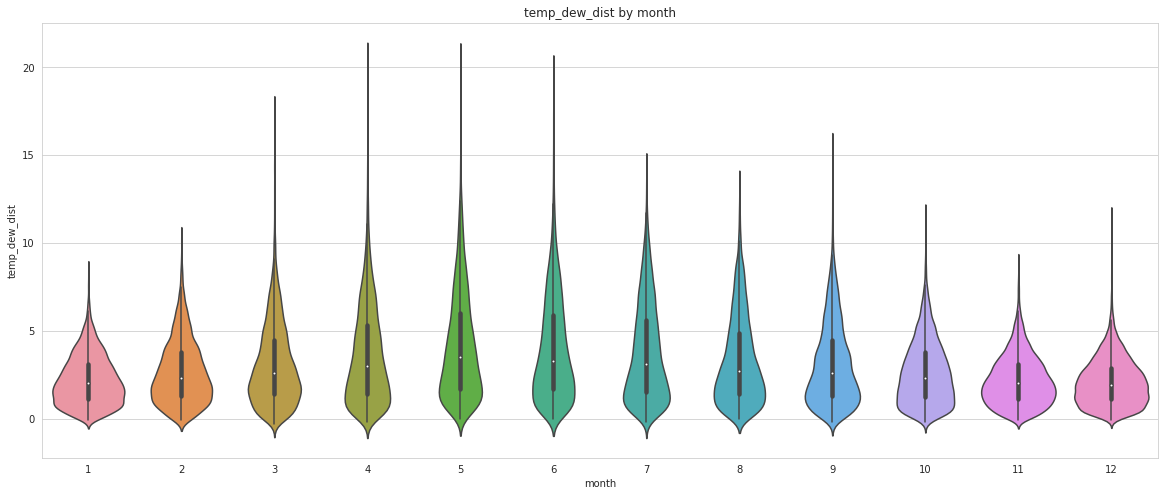

----------------------------------------------------------------------------------------------------
rainfall12hma


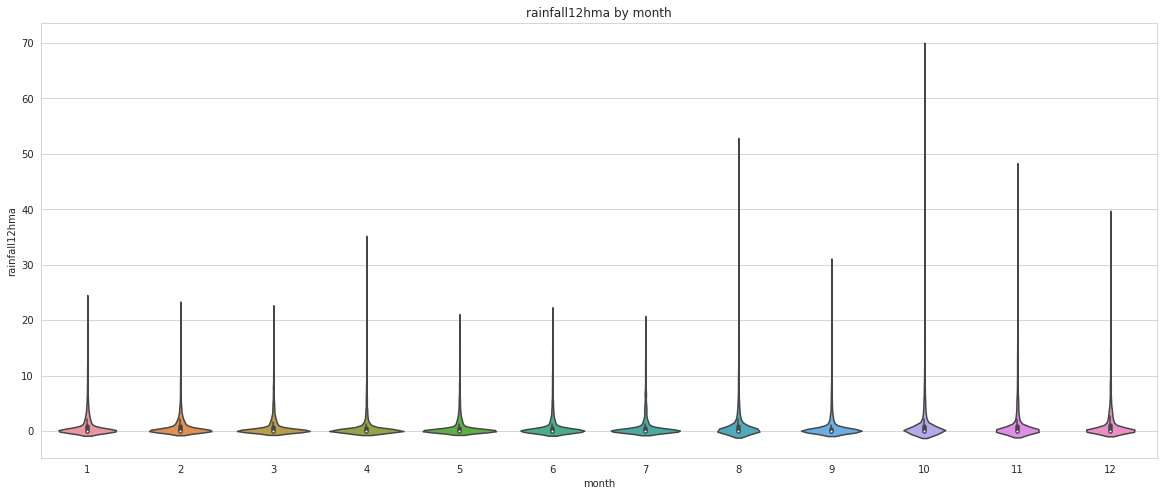

----------------------------------------------------------------------------------------------------


In [ ]:
for var in continuous:
  print(var)
  month_vplot(var, df, with_target=False)
  print("-"*100)

clow


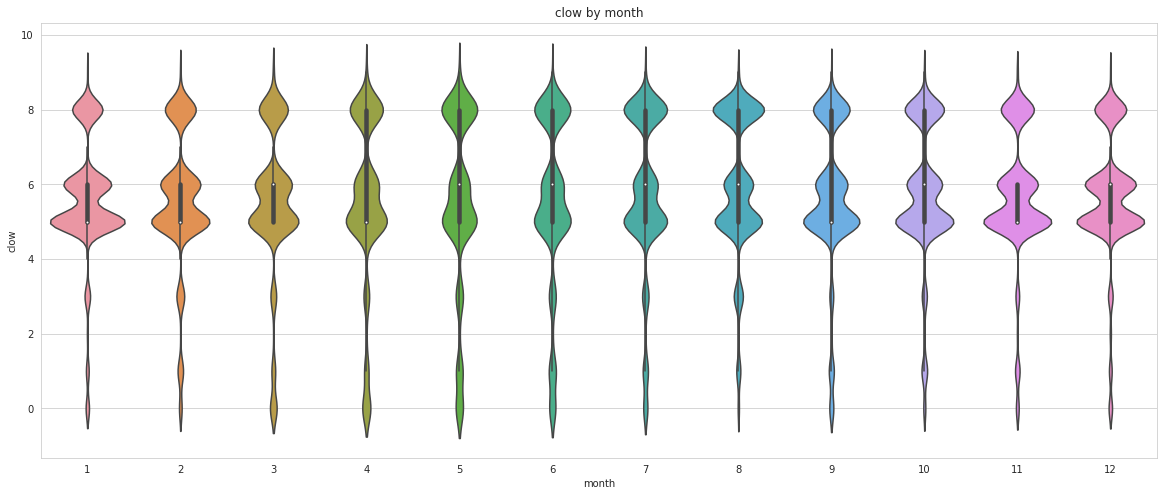

----------------------------------------------------------------------------------------------------
cmedium


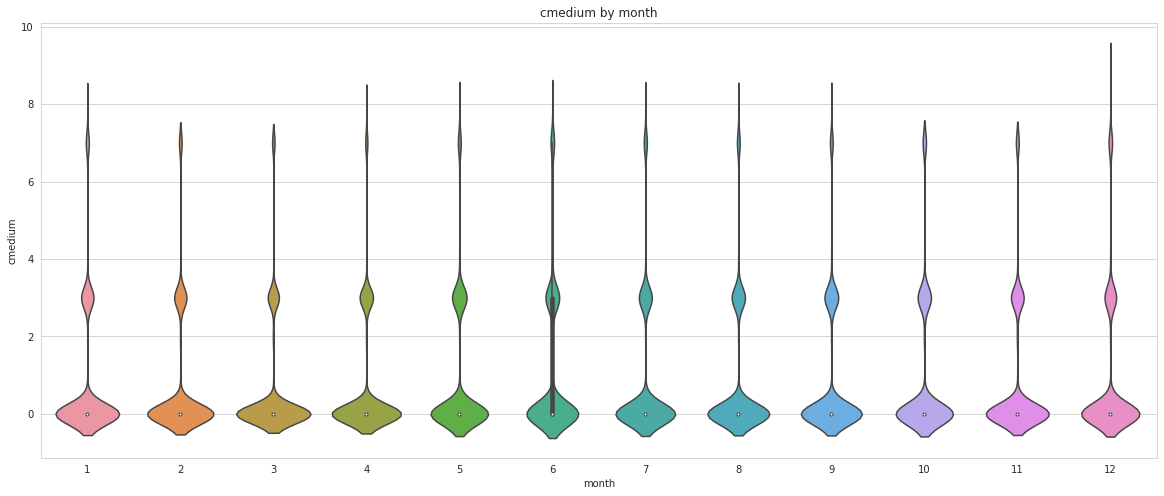

----------------------------------------------------------------------------------------------------
chigh


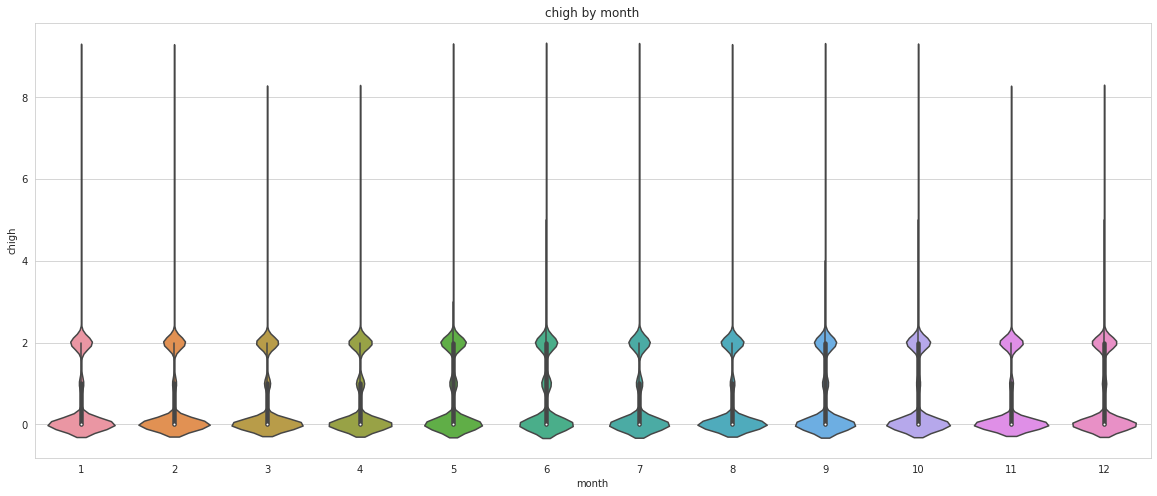

----------------------------------------------------------------------------------------------------
nlc


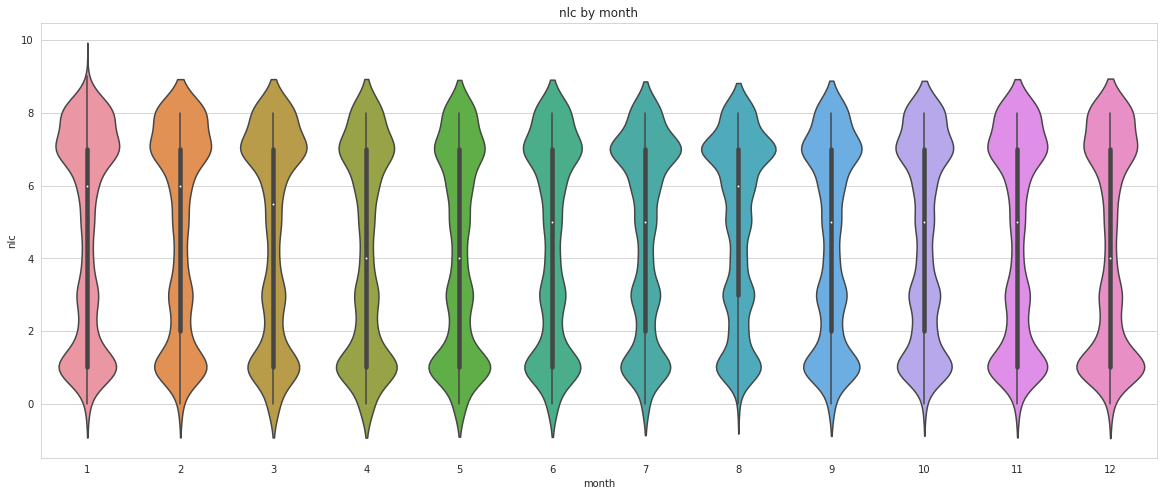

----------------------------------------------------------------------------------------------------
ntot


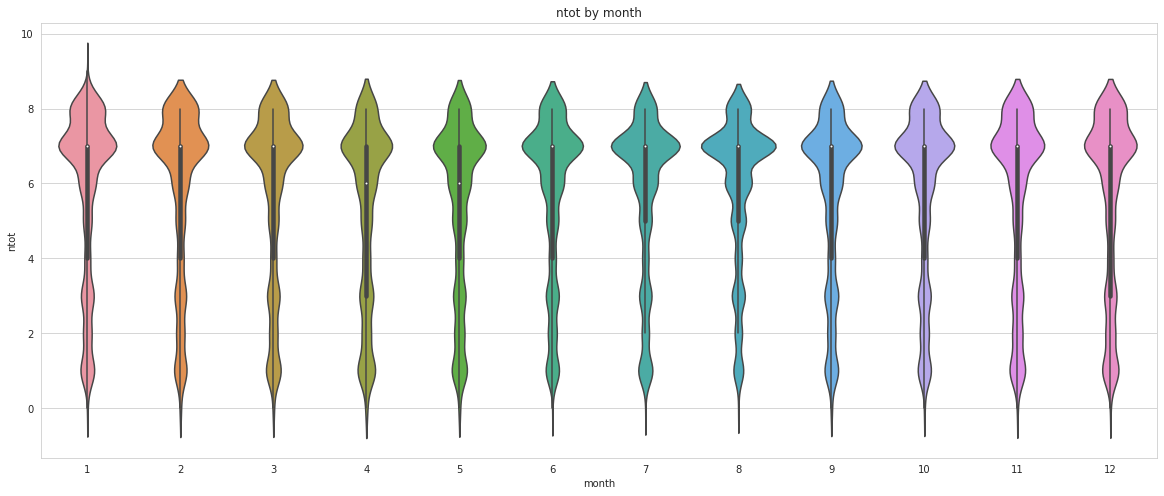

----------------------------------------------------------------------------------------------------
nsig1


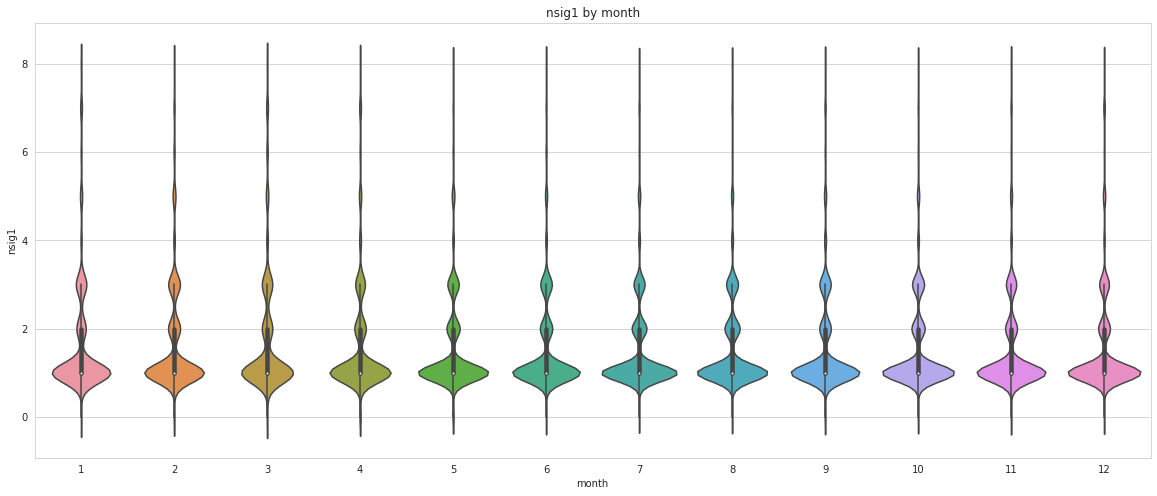

----------------------------------------------------------------------------------------------------
nsig2


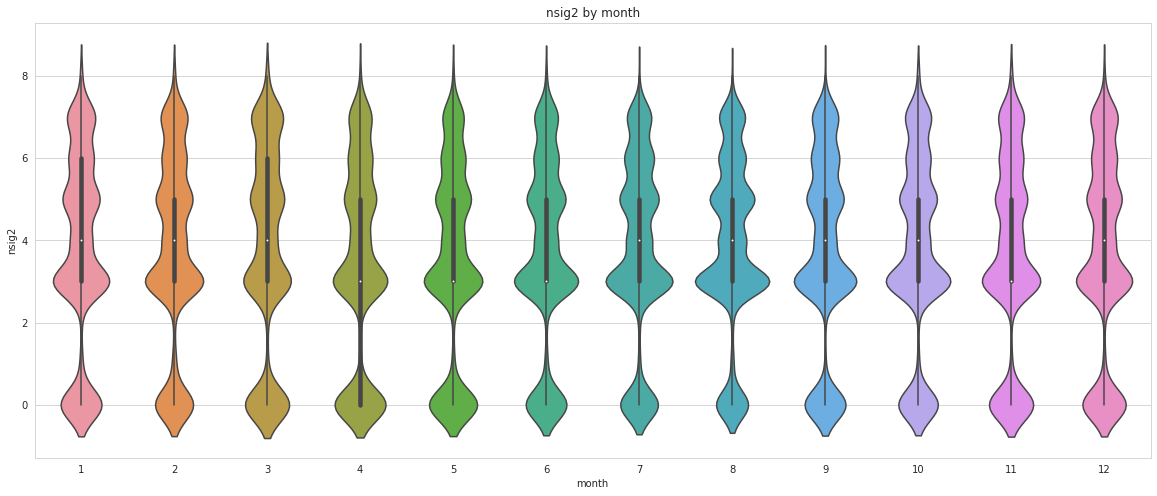

----------------------------------------------------------------------------------------------------
nsig3


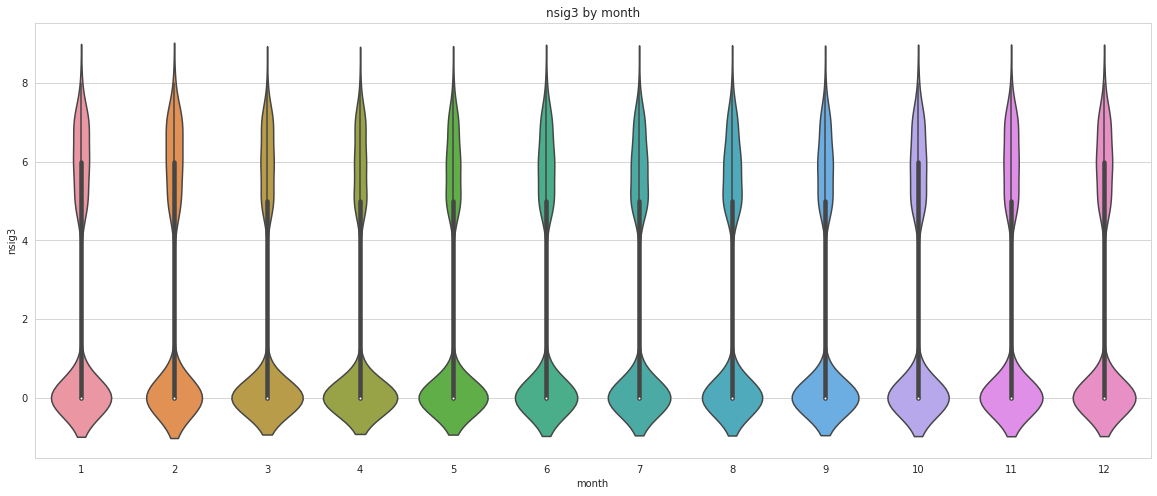

----------------------------------------------------------------------------------------------------
nsig4


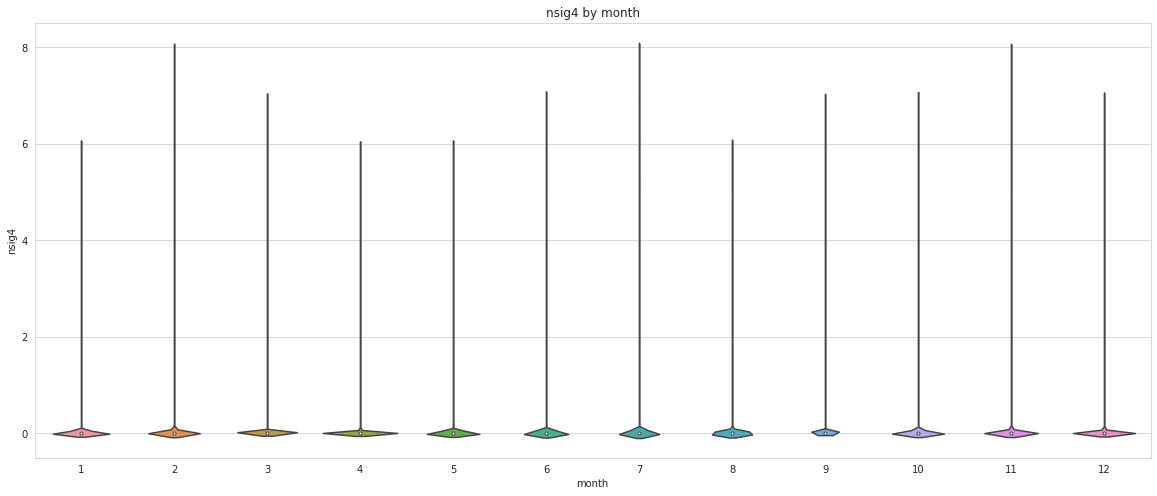

----------------------------------------------------------------------------------------------------
tsig4


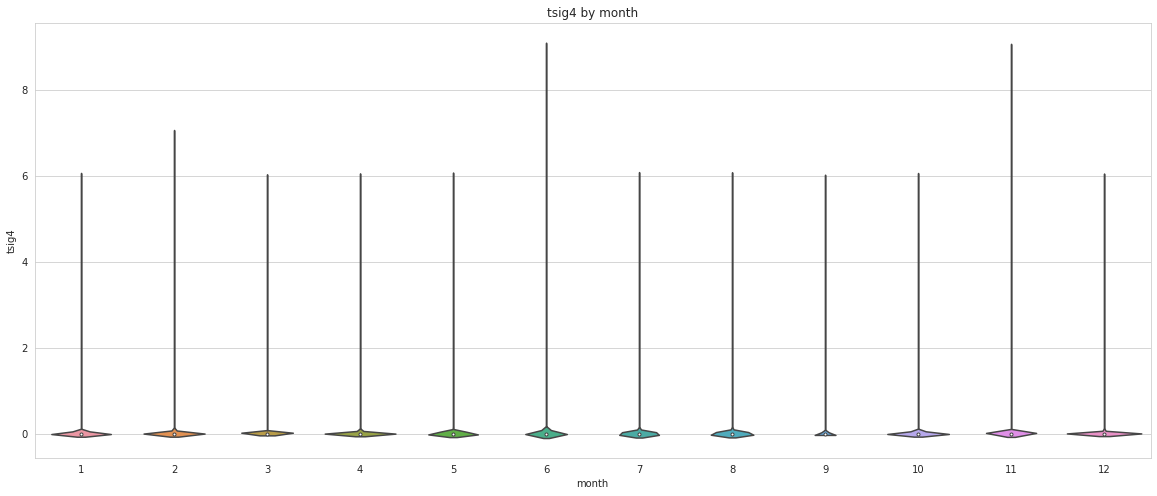

----------------------------------------------------------------------------------------------------
duration


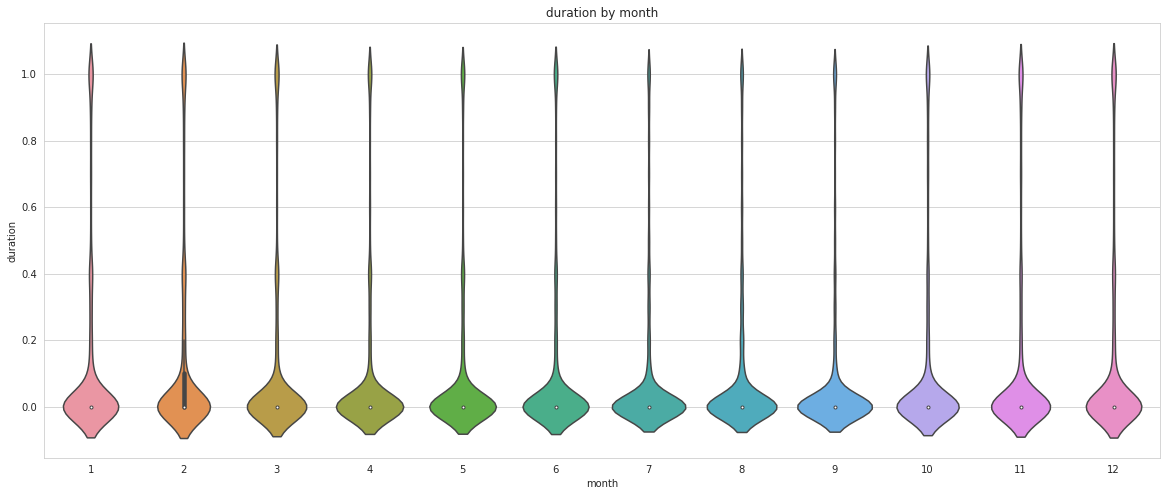

----------------------------------------------------------------------------------------------------
sunshine


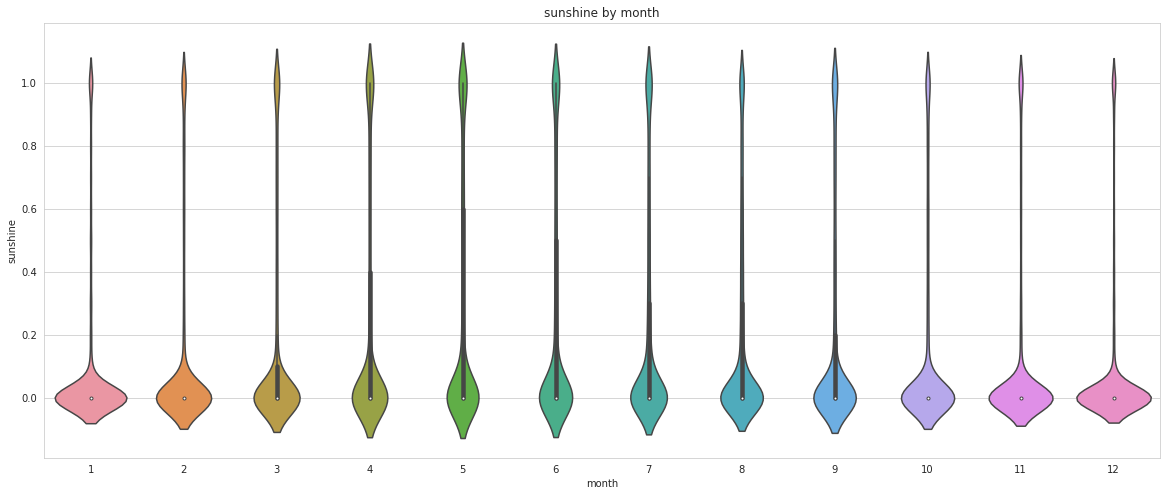

----------------------------------------------------------------------------------------------------


In [ ]:
for var in discrete:
  print(var)
  month_vplot(var, df, with_target=False)
  print("-"*100)

### Visibility by variable values

fog_state


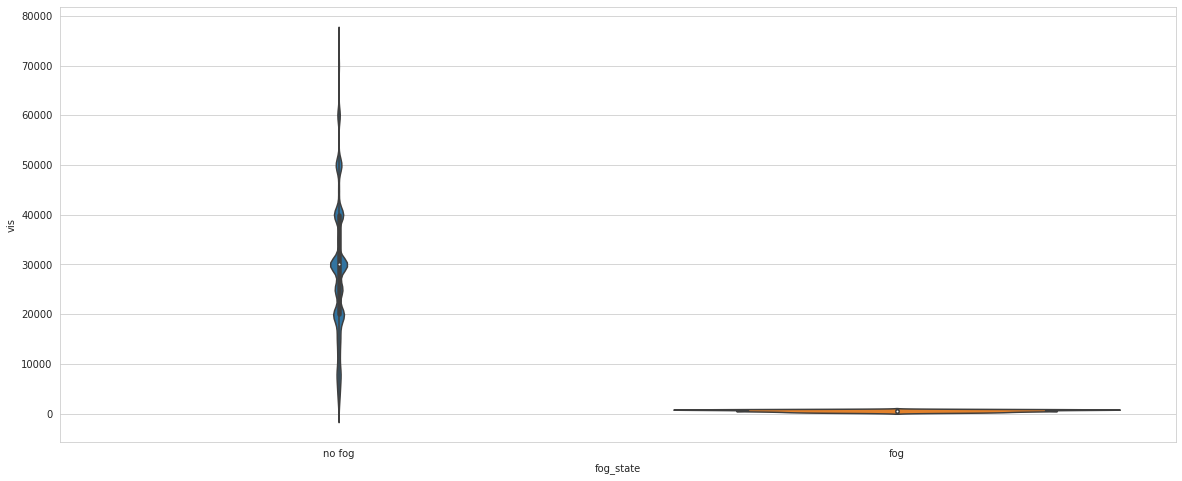

----------------------------------------------------------------------------------------------------
season


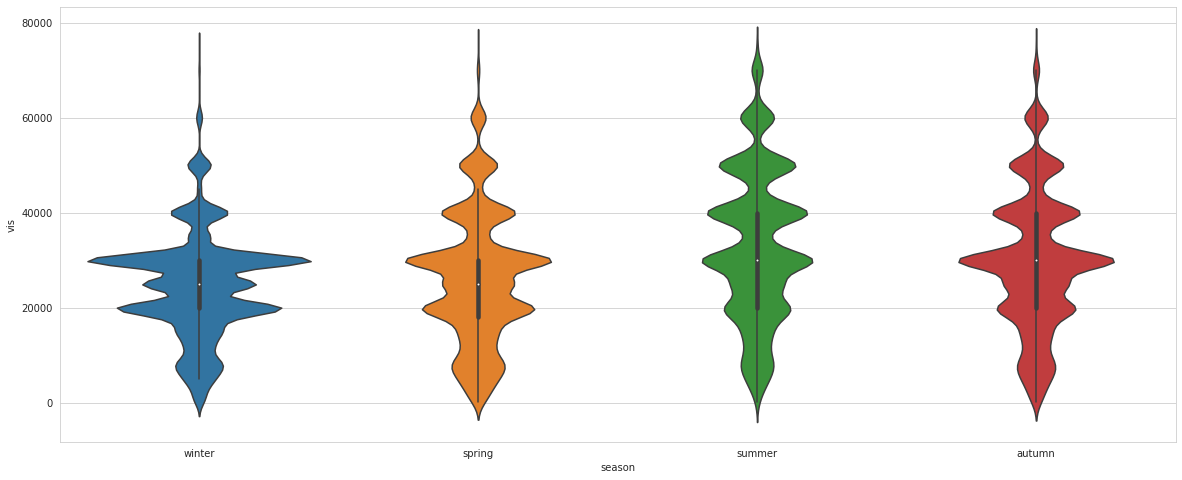

----------------------------------------------------------------------------------------------------
tsig1


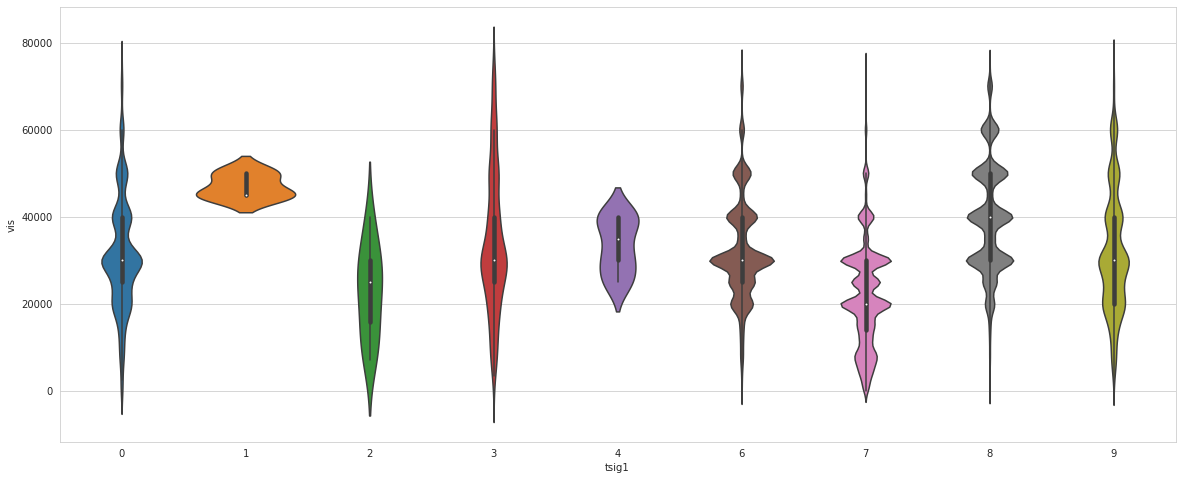

----------------------------------------------------------------------------------------------------
tsig2


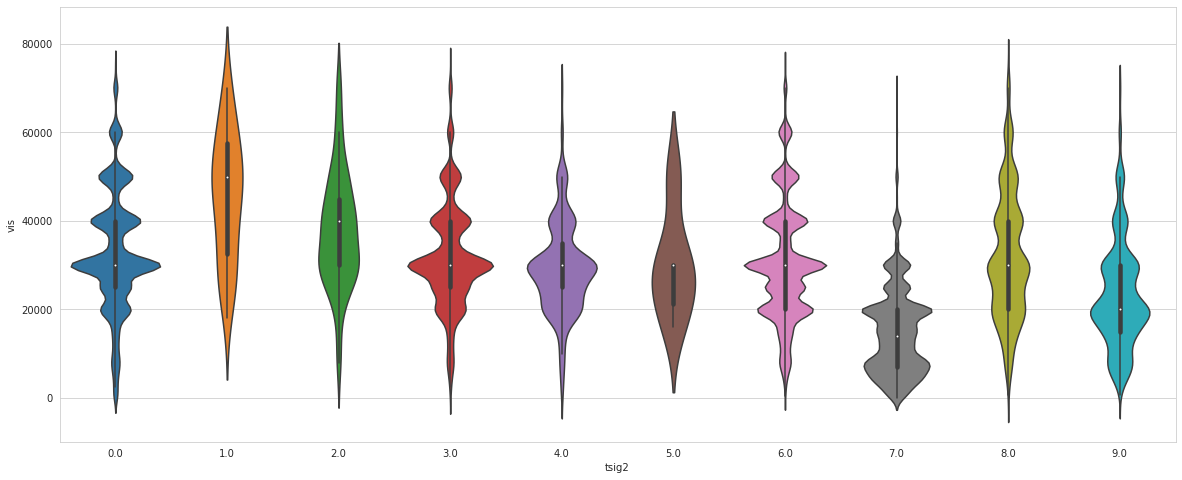

----------------------------------------------------------------------------------------------------
tsig3


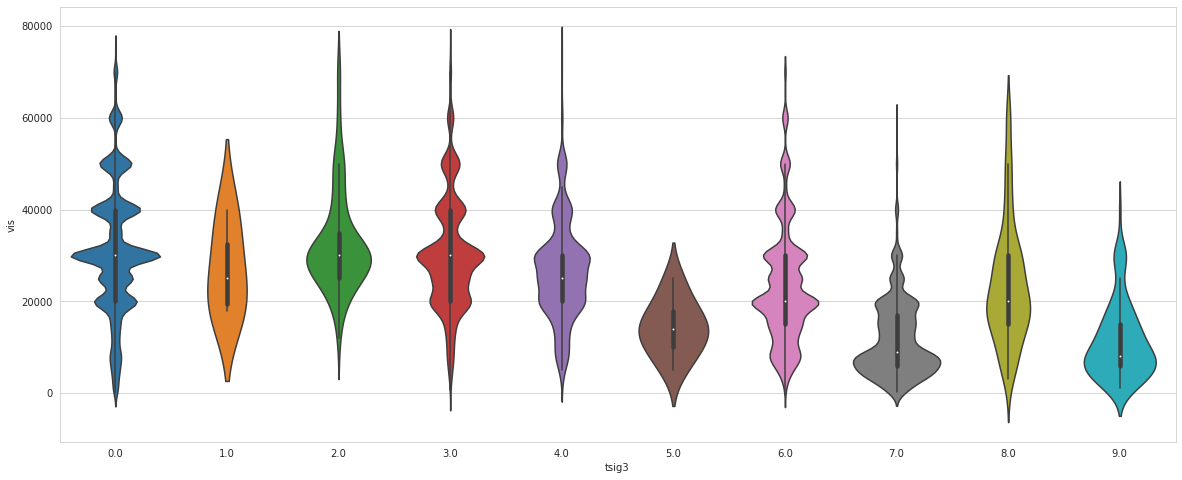

----------------------------------------------------------------------------------------------------
pchar


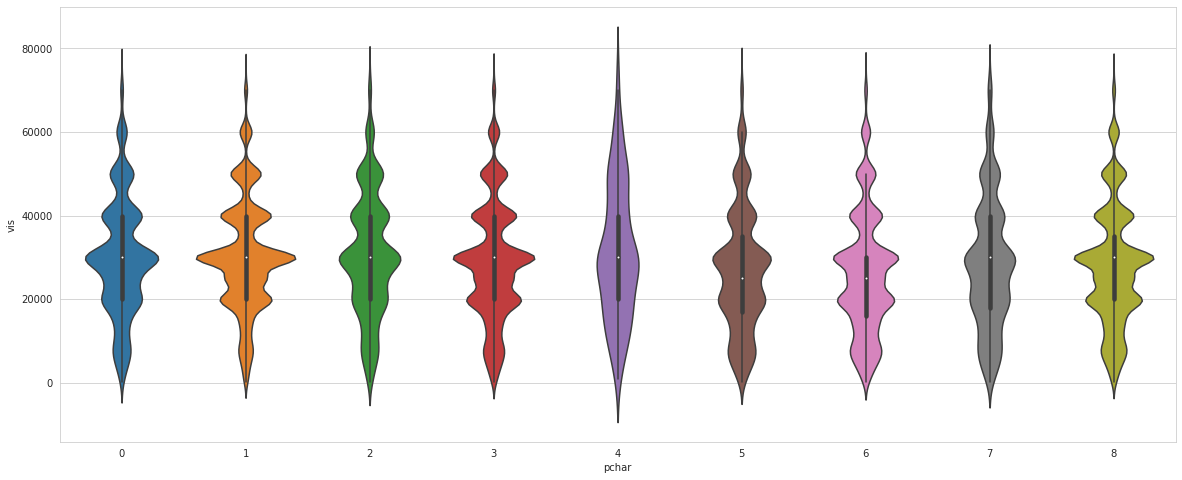

----------------------------------------------------------------------------------------------------
w


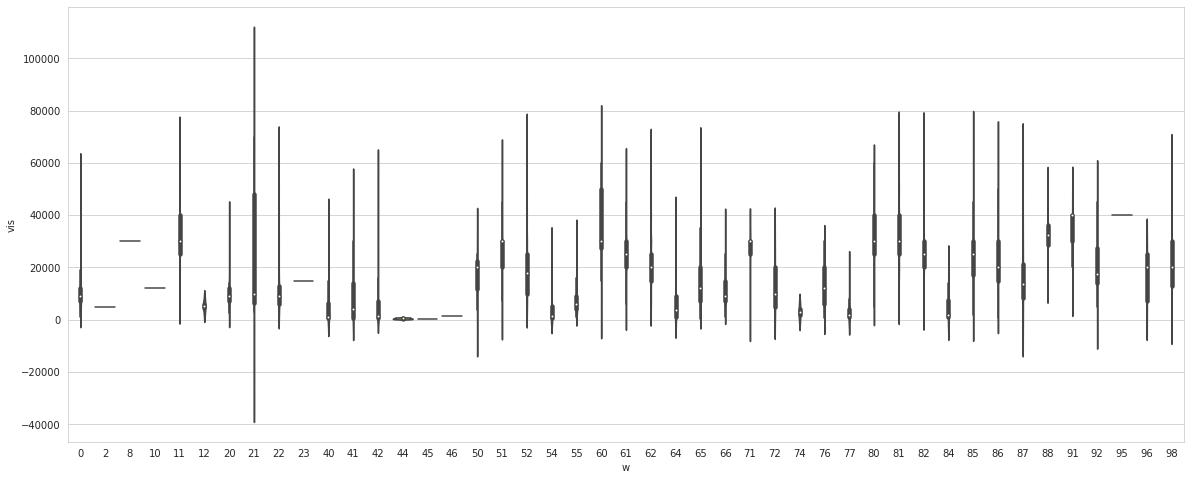

----------------------------------------------------------------------------------------------------
ww


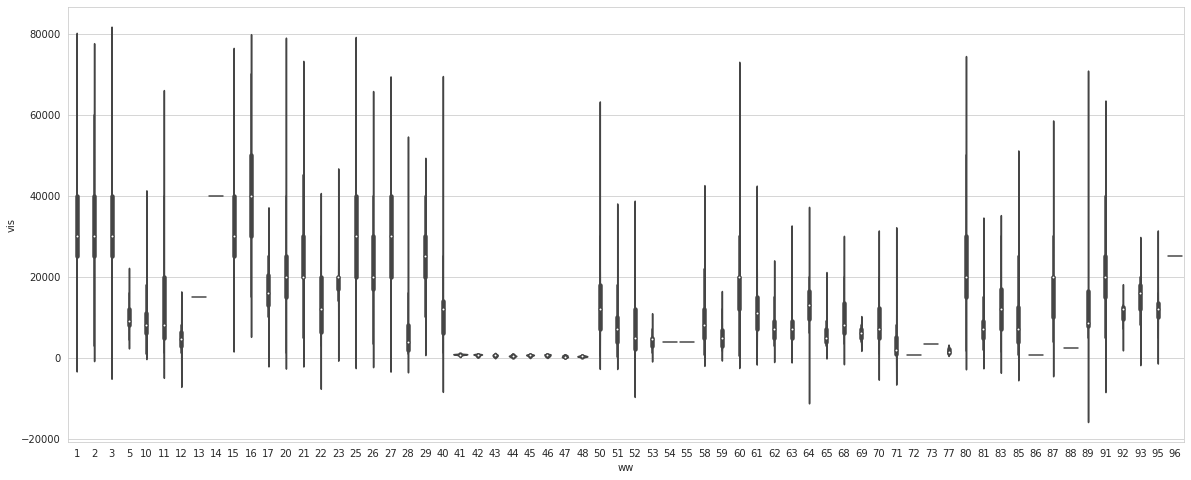

----------------------------------------------------------------------------------------------------
pweather


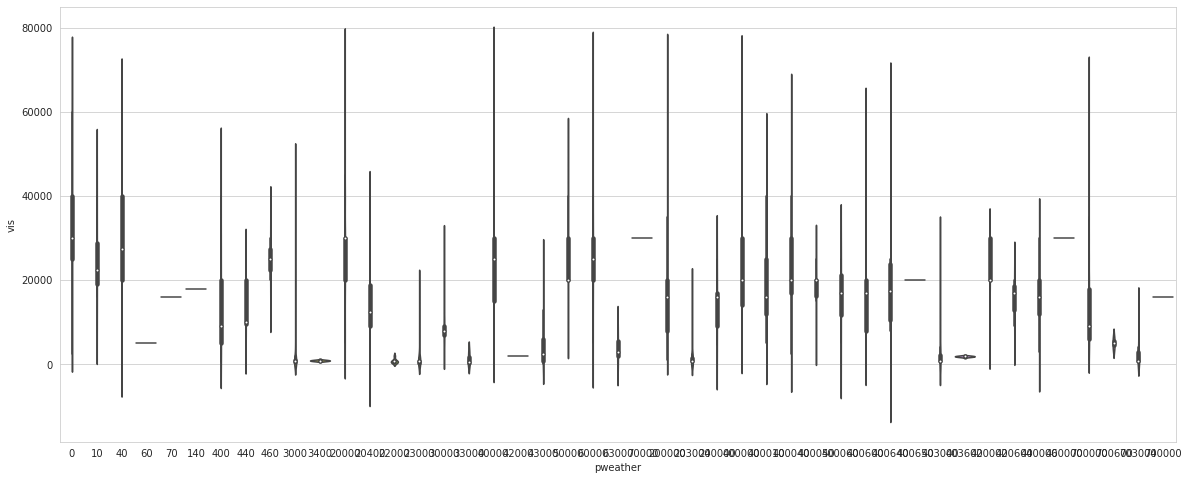

----------------------------------------------------------------------------------------------------
weather


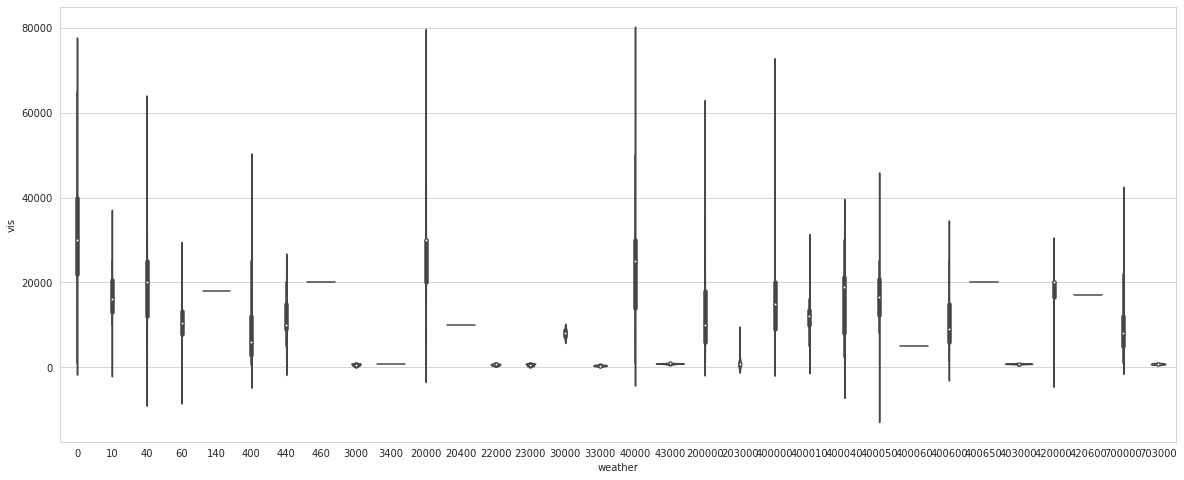

----------------------------------------------------------------------------------------------------


In [ ]:
for var in categorical:
  print(var)
  plot_vis_discrete(var, df)
  print("-"*100)

In [ ]:
for var in continuous:
  print(var)
  plot_vis_continuous(var, df, alpha=0.3)
  print("-"*100)

Output hidden; open in https://colab.research.google.com to view.

### Correlation analysis

This section is for exploring the relationships between variables.

Wet and dry bulb temperature variables capture the same information,

In [ ]:
df_day = df.resample('D').mean()
df_month = df.resample('M').mean()

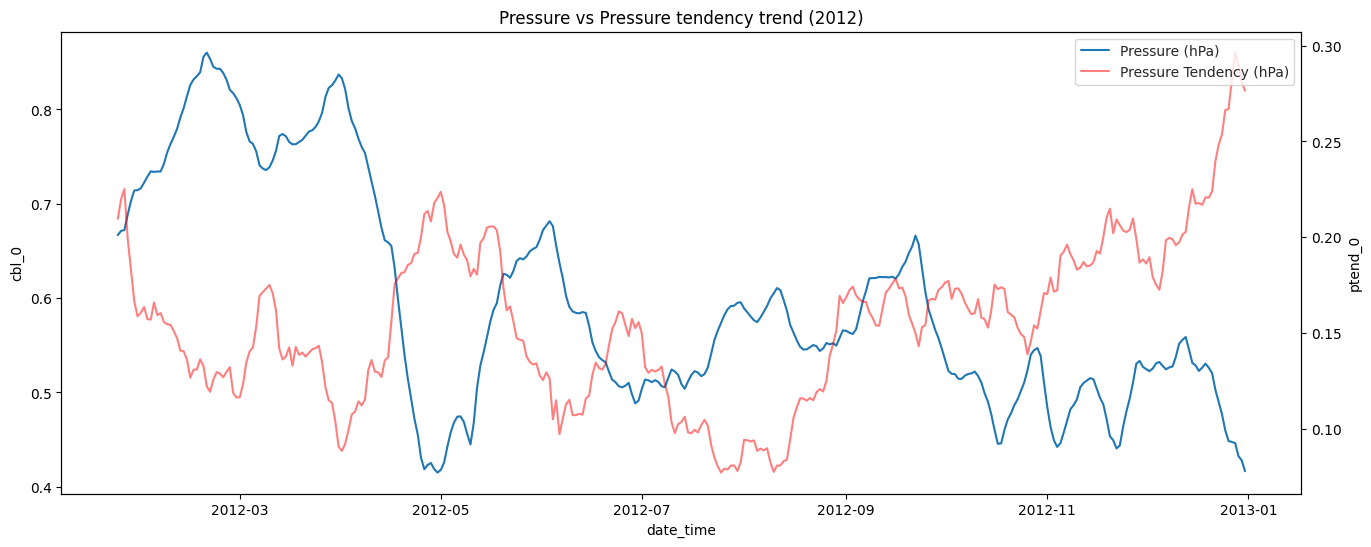

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 6))
ax2=ax1.twinx()

sns.set_style('white')

mms_1 = MinMaxScaler()
mms_2 = MinMaxScaler()

# get sample to view the relationship between pressure and pressure tendency
sample = df_day.loc[(df_day.index >= '2012-01-01') & (df_day.index <= '2012-12-31'), ['cbl', 'ptend']]
sample['cbl_0'] = mms_1.fit_transform(sample['cbl'].to_frame())
sample['ptend_0'] = mms_2.fit_transform(sample['ptend'].to_frame())

sns.lineplot(x=sample.index, y=sample.cbl_0.rolling(24).mean(), 
             data=sample, ax=ax1, 
             label='Pressure (hPa)', legend=0)
sns.lineplot(x=sample.index, y=sample.ptend_0.rolling(24).mean(), 
             data=sample, ax=ax2, color='red', alpha=0.5, 
             label='Pressure Tendency (hPa)')

handles, labels = [(a + b) for a, b, in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
ax2.legend(handles, labels, loc='upper right')
plt.title("Pressure vs Pressure tendency trend (2012)")

plt.show()

- Negative correlation between pressure and pressure tendency. We can see in the example from the 2012 graph above that pressure and tendency trends often disagree.


In [ ]:
df[continuous].corr()

dir     speed       vis     ptend       cbl       msl   drybulb   wetbulb     dewpt        vp        rh       hlc     hsig1     hsig2     hsig3     hsig4   ceiling       dos  rainfall    tabdir  tabspeed       dni  temp_dew_dist  rainfall12hma
dir            1.000000  0.117063  0.146241  0.062344 -0.032442 -0.030750 -0.115564 -0.116729 -0.104923 -0.110354  0.039433 -0.067448 -0.067419 -0.030940 -0.014446  0.000731 -0.036721  0.002245 -0.051118  0.877122  0.122139 -0.062614      -0.046045      -0.006225
speed          0.117063  1.000000 -0.038326  0.328750 -0.330868 -0.331420  0.013789 -0.022150 -0.074314 -0.080176 -0.194379 -0.122225 -0.122162 -0.077079  0.045040  0.002592 -0.050880  0.005590  0.064565  0.108210  0.965360  0.143812       0.168507       0.125590
vis            0.146241 -0.038326  1.000000 -0.112069  0.174205  0.171434  0.197776  0.075821 -0.079960 -0.085785 -0.579068  0.180344  0.180374  0.186907  0.031421 -0.010602  0.183838 -0.020875 -0.243399  0.157862 -0.033003  0.200816       0.566009      -0.235140
ptend          0.062344  0.328750 -0.112069  1.000000 -0.324943 -0.323143 -0.143845 -0.137158 -0.121493 -0.131442  0.060615 -0.071076 -0.071026 -0.057878  0.018638  0.002289 -0.055768 -0.001414  0.148074  0.059385  0.333314 -0.070588      -0.074411       0.160004
cbl           -0.032442 -0.330868  0.174205 -0.324943  1.000000  0.999887  0.073682  0.047591  0.013318  0.017677 -0.121124  0.160544  0.160542  0.047448 -0.094081 -0.029225  0.025378 -0.038960 -0.189572 -0.028294 -0.335426  0.048482       0.129943      -0.335574
msl           -0.030750 -0.331420  0.171434 -0.323143  0.999887  1.000000  0.058880  0.033108  0.000233  0.004814 -0.115182  0.160760  0.160758  0.046963 -0.095788 -0.029317  0.023881 -0.037906 -0.189665 -0.026553 -0.335945  0.042853       0.123380      -0.335774
drybulb       -0.115564  0.013789  0.197776 -0.143845  0.073682  0.058880  1.000000  0.976119  0.879790  0.867691 -0.408056 -0.003180 -0.003166  0.034926  0.108820  0.003911  0.101366 -0.071601 -0.005661 -0.118790  0.011112  0.382022       0.451250      -0.008435
wetbulb       -0.116729 -0.022150  0.075821 -0.137158  0.047591  0.033108  0.976119  1.000000  0.960786  0.948783 -0.205436 -0.045961 -0.045950 -0.004220  0.104330  0.006144  0.060800 -0.076004  0.036488 -0.120902 -0.025733  0.305821       0.248978       0.040774
dewpt         -0.104923 -0.074314 -0.079960 -0.121493  0.013318  0.000233  0.879790  0.960786  1.000000  0.987659  0.070518 -0.091539 -0.091531 -0.050610  0.091240  0.008217  0.006971 -0.076218  0.083757 -0.109972 -0.079161  0.187761      -0.027206       0.095572
vp            -0.110354 -0.080176 -0.085785 -0.131442  0.017677  0.004814  0.867691  0.948783  0.987659  1.000000  0.072582 -0.091458 -0.091460 -0.055798  0.084505  0.008722 -0.002160 -0.063851  0.082527 -0.115161 -0.085160  0.184351      -0.029482       0.094569
rh             0.039433 -0.194379 -0.579068  0.060615 -0.121124 -0.115182 -0.408056 -0.205436  0.070518  0.072582  1.000000 -0.157063 -0.157085 -0.173720 -0.064187  0.006411 -0.204811  0.004365  0.183760  0.036395 -0.198302 -0.438810      -0.990478       0.210258
hlc           -0.067448 -0.122225  0.180344 -0.071076  0.160544  0.160760 -0.003180 -0.045961 -0.091539 -0.091458 -0.157063  1.000000  0.999967 -0.002138 -0.074958 -0.009369  0.080155 -0.009091 -0.078813 -0.066067 -0.122936 -0.031355       0.165159      -0.115980
hsig1         -0.067419 -0.122162  0.180374 -0.071026  0.160542  0.160758 -0.003166 -0.045950 -0.091531 -0.091460 -0.157085  0.999967  1.000000 -0.002135 -0.074958 -0.009372  0.080180 -0.009095 -0.078835 -0.066038 -0.122874 -0.031426       0.165173      -0.115996
hsig2         -0.030940 -0.077079  0.186907 -0.057878  0.047448  0.046963  0.034926 -0.004220 -0.050610 -0.055798 -0.173720 -0.002138 -0.002135  1.000000  0.003636 -0.015503  0.648414 -0.006248 -0.094028 -0.025611 -0.077733  0.010967       0.168455      -0.103419
hsig3         -0.014446  0.045040  0.031421  0.018638 -0.094

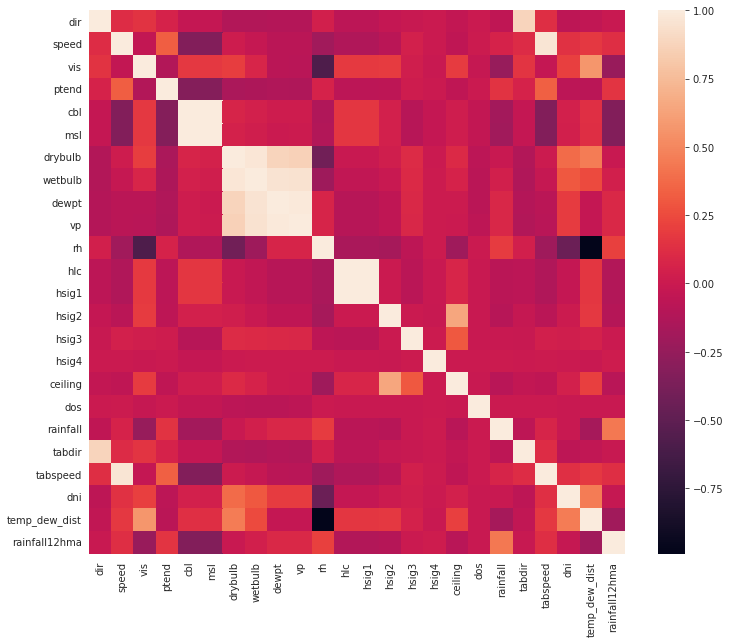

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[continuous].corr())
plt.show()

Strong positive linear correlation between dew point temperature and air temperature. So for higher observed temperatures, the temperature which the air would need to be cooled to to reach 100 RH also increases. This shows that as the temperature rose, the air absorbs more moisure; if this wasn't the case, the dew point would remain the same.

Weak negative linear correlation between temperature and relative humidity. This helps us explain why there are less fog events in the summer than in the other colder months. The air absorbs moisture as temperature rises, but usuallt not at a high enough rate to maintain the relative humidity level.

Range of observed atmospheric pressure values is narrower for lower relative humidity values, and more wide for the higher relative humidities. Although, atmospheric pressure and relative humidity are not directly related. 

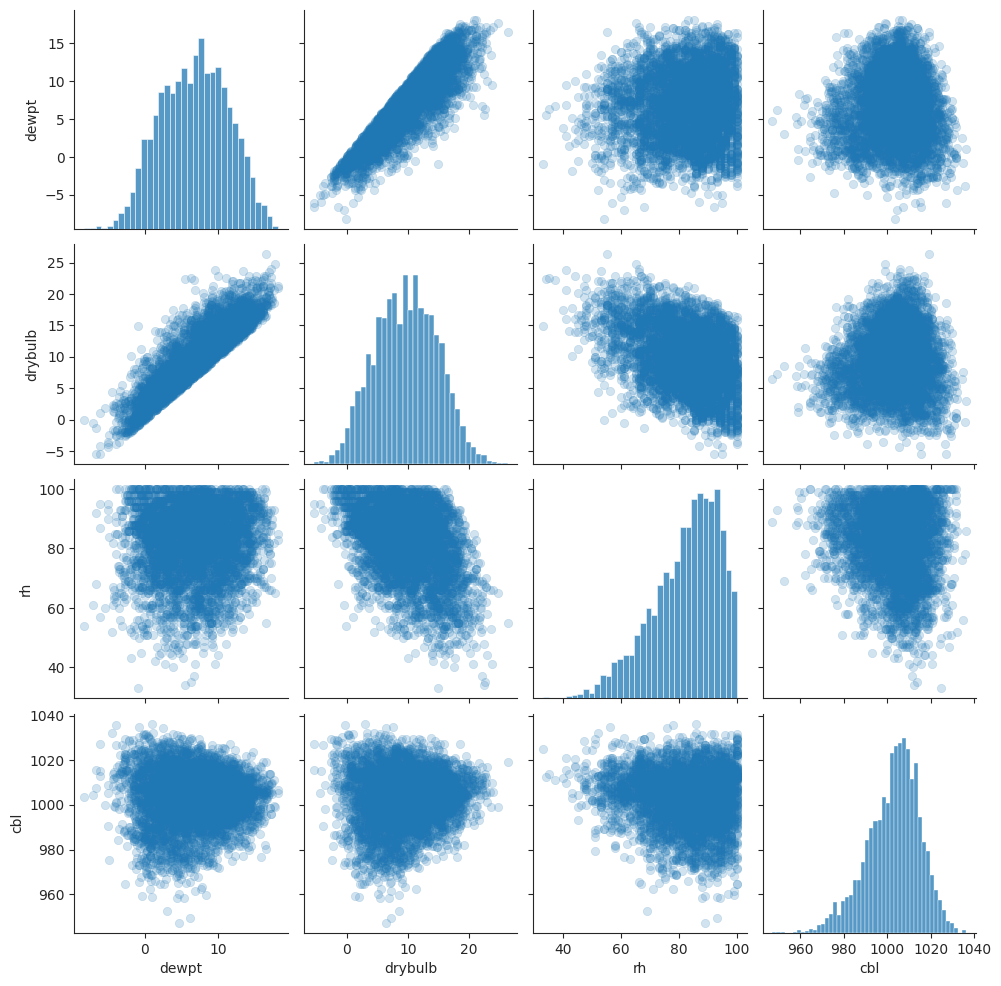

In [ ]:
# how do dew point temperature, temperature, relative humidity, and pressure correlate?
sns.pairplot(df.sample(5000, random_state=seed)[['dewpt', 'drybulb', 'rh', 'cbl']], 
             kind='scatter', plot_kws= {'alpha': 0.2, 'edgecolor': None})
plt.show()

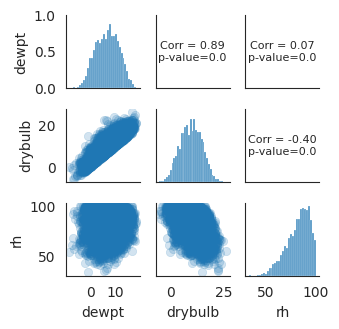

In [ ]:
# Create pairplot with Pearson correlations
temp_rh_dewpt = df.sample(5000, random_state=seed)[['dewpt', 'drybulb', 'rh']]
g = sns.PairGrid(temp_rh_dewpt, aspect=1, height=1.1)
#g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot, edgecolor=None, alpha=0.2)

# Add Pearson correlations on the upper left corner
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    corr = stats.pearsonr(temp_rh_dewpt.iloc[:, i], temp_rh_dewpt.iloc[:, j])
    g.axes[i, j].annotate(f"Corr = {corr[0]:.2f}\np-value={np.round(corr[1], 4)}",
        (0.5, 0.5),
        xycoords='axes fraction',
        ha='center',
        va='center',
        fontsize=8,)

# Show the plot
plt.show()

In [ ]:
df.dni.corr(df.drybulb)

0.3820222129833815

The relationship between atmospheric pressure and relative humidity is complex and influenced by many factors, including air temperature, the amount of moisture in the air, altitude, and the movement of air masses. At a constant temperature, as the atmospheric pressure increases, the saturation vapor pressure also increases, which allows the air to hold more moisture, resulting in a decrease in relative humidity. Conversely, as the atmospheric pressure decreases, the saturation vapor pressure also decreases, allowing the air to hold less moisture, resulting in an increase in relative humidity.

We observe the explained relationship in the scatterplots below in the weak negative correlation between pressure measured using a barometer and relative humidity. This shows that for the fixed temperature ranges shown here (~6.2, ~9.8, ~13.4), increase in atmospheric pressure as measured by the barometer shows correlate with lower relative humidities. Note that the relationship is not straightforward even when we control for air temperature, so the linear correlation is weak.

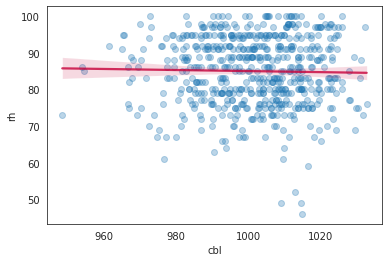

-0.018776457501101452


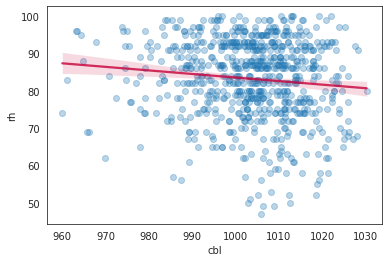

-0.10430351714227873


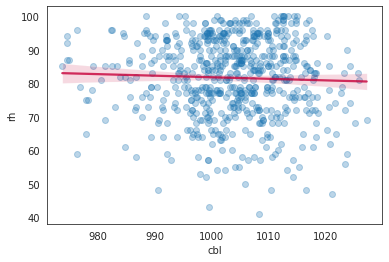

-0.011522133753608402


In [ ]:
# We fix temperature in narrow ranges, and check the relationship between pressure and relative humidity

ranges = [(6.2, 6.22), (9.8, 9.82), (13.4, 13.42)]

# checking the trend for 3 different control range temperatures
# the first, second, and third quantile temperature values in the dataset.
for r in ranges:  
  temp_controlled = df.loc[(df.drybulb >= r[0])&(df.drybulb <= r[1])]
  sns.regplot(x="cbl", y="rh", data=temp_controlled, 
             line_kws={'color':'#C70039', 'alpha':0.8}, scatter_kws={'alpha':0.3})
  plt.show()
  print(temp_controlled.cbl.corr(temp_controlled.rh, method='spearman'))

In [ ]:
for var in discrete:
  print(f"{var} correlation with visibility: {np.round(df.vis.corr(df[var]), 4)}")


clow correlation with visibility: 0.1026
cmedium correlation with visibility: 0.1023
chigh correlation with visibility: 0.2457
nlc correlation with visibility: -0.3542
ntot correlation with visibility: -0.2915
nsig1 correlation with visibility: -0.1833
nsig2 correlation with visibility: -0.1598
nsig3 correlation with visibility: -0.2558
nsig4 correlation with visibility: -0.0195
tsig4 correlation with visibility: -0.0197
duration correlation with visibility: -0.3917
sunshine correlation with visibility: 0.3431


### Fog analysis

fog climatology, occurences by month, persistence, etc. to be explored here

In [ ]:
# fog accounts for ~0.8% of observations in the data
df.fog_state.value_counts(normalize=True)

no fog    0.992243
fog       0.007757
Name: fog_state, dtype: float64

#### Visibility Time Series

There is no trend in or cyclical pattern observed from the visibility time series, but there is seasonal variation. The variations appear roughly constant in size over time and don't appear to depend on the level of time series, so we describe this using an additive time series model. 

In [ ]:
sample = df_day.loc[:, ['vis']]
res = seasonal_decompose(sample.vis, period=365).seasonal

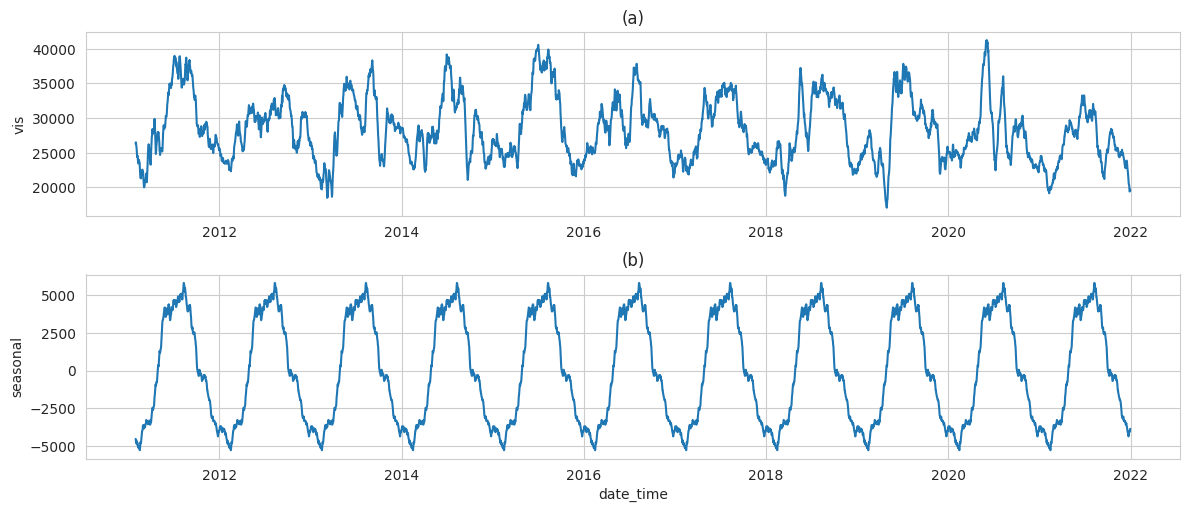

In [ ]:
# visibility time series
sns.set_style('whitegrid')
fig, axs = plt.subplots(2, 1, figsize=(12, 5))


sns.lineplot(x=sample.index, y=sample.vis.rolling(31).mean(), 
             data=sample, 
             label='Pressure (hPa)', legend=0, ax = axs[0])
sns.lineplot(x=res.index, y=res.rolling(31).mean(), ax=axs[1])

plt.tight_layout()
axs[0].set(title = '(a)', xlabel=None)
axs[1].set(title='(b)')

plt.show()

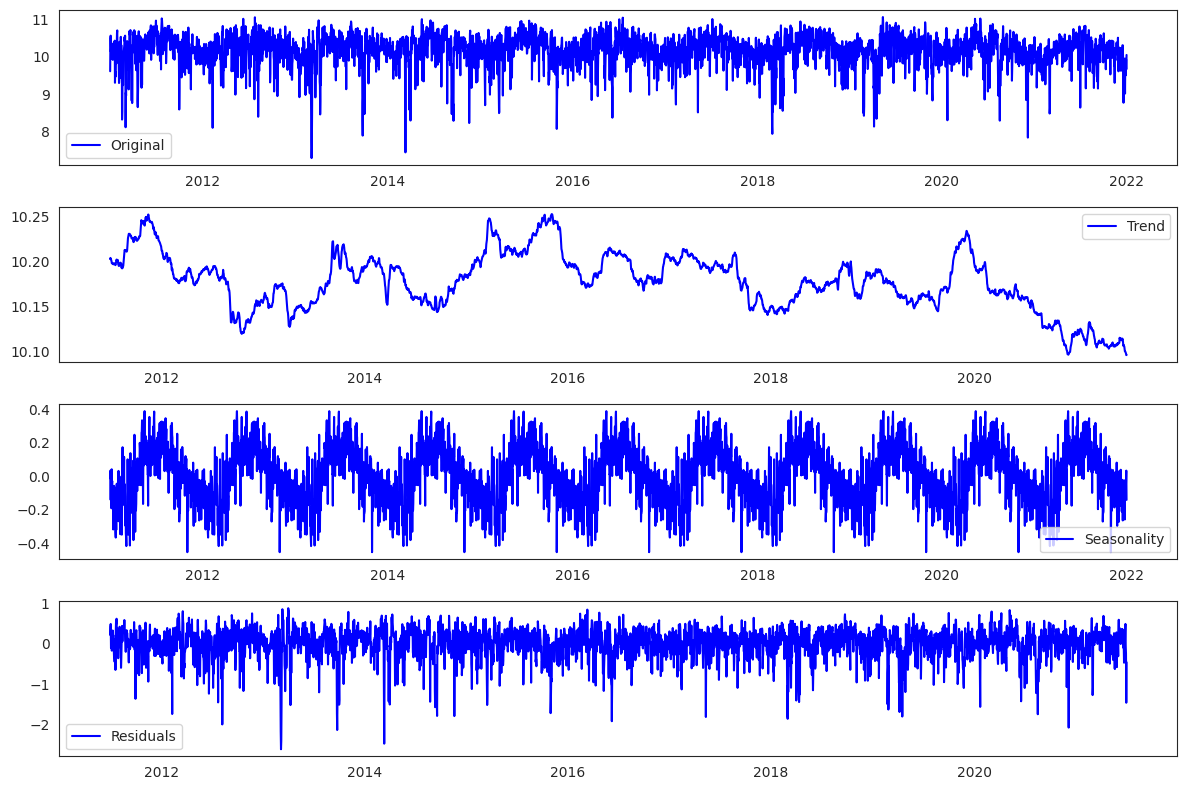

In [ ]:
def decomposition_plot(ts, period=365):
# Apply seasonal_decompose 
    decomposition = seasonal_decompose(np.log(ts), period=period)
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

decomposition_plot(sample.vis, period=365)

Seasonal decomposition reveals that visibility is lowest in the winter months and highest in summer months.

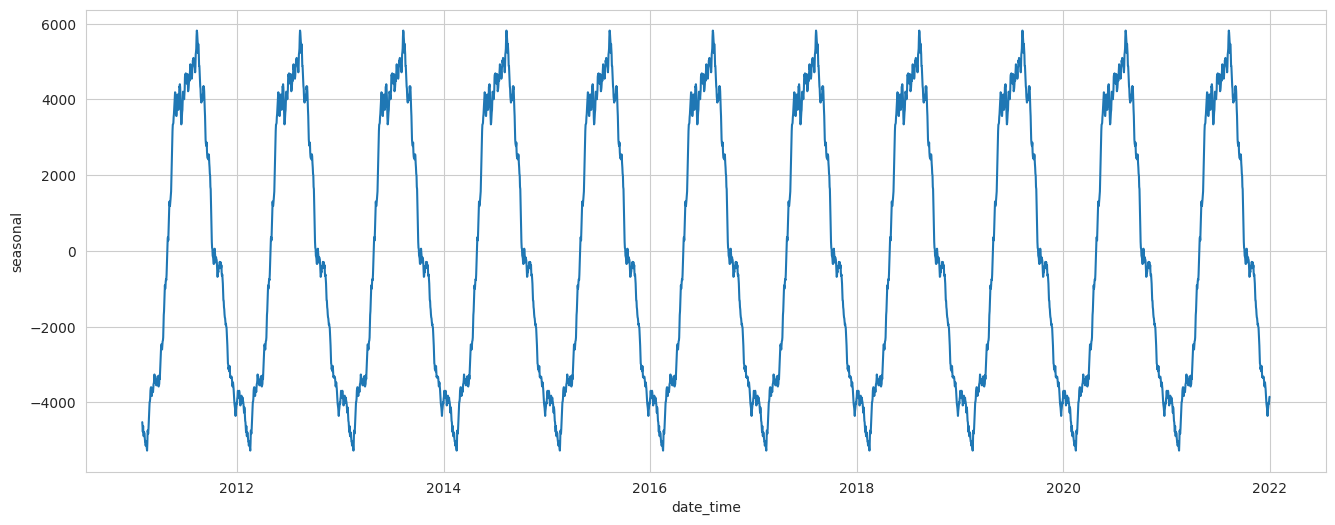

In [ ]:
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
sns.lineplot(x=res.index, y=res.rolling(31).mean())
plt.show()

Visibility in the winter and spring months is quite similar in Ireland. This is likely because the winter climate tends to overflow into the spring months. By the last month of spring (April) the visibility levels rise, and then fall again in Autumn.

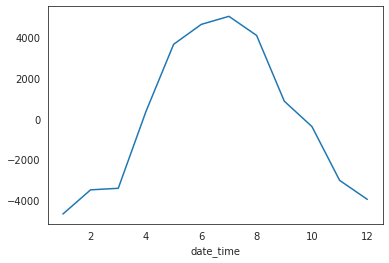

In [ ]:
# visibility seasonality by month
res.groupby(res.index.month).mean().plot()
plt.show()

In [ ]:
res.groupby(res.index.month).mean()

date_time
1    -4669.073568
2    -3482.927606
3    -3406.703149
4      359.353721
5     3659.461415
6     4640.236350
7     5034.929283
8     4098.232261
9      871.498044
10    -376.705409
11   -3017.734341
12   -3949.119826
Name: seasonal, dtype: float64

#### Fog duration analysis

fog episode duration positively skewed with a minimum duration of 2 hrs, and a maximum of 19 hours recorded since 2011. We can look more into that instance. The mean fog duration was about 4 hours, with median of 3 and mode of 2.

In [ ]:
fog_df.describe()

fog_duration      min_vis
count    254.000000   254.000000
mean       3.944882   599.212598
std        2.937577   234.393023
min        2.000000   100.000000
25%        2.000000   400.000000
50%        3.000000   600.000000
75%        5.000000   800.000000
max       19.000000  1000.000000

In [ ]:
events_by_month = fog_df.groupby(fog_df.date_time.dt.month).agg(Count=('fog_duration', lambda x: x.count()))

In [ ]:
events_by_month

Count
date_time       
1             18
2             20
3             37
4             16
5             12
6             16
7              9
8             26
9             28
10            21
11            26
12            25

<Axes: xlabel='date_time', ylabel='Count'>

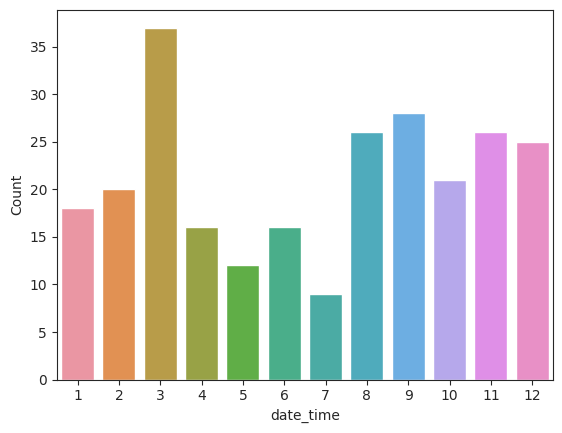

In [ ]:
sns.barplot(x=events_by_month.index, y=events_by_month.Count)

In [ ]:
# fog events by season
# different from fog observations per season
fog_df.groupby('season').agg(n=('fog_duration', 'count'))

n
season    
autumn  75
spring  73
summer  37
winter  69

In [ ]:
# fog events by year
fog_df.groupby('year').agg(n=('fog_duration', 'count'))

n
year    
2011  15
2012  26
2013  21
2014  39
2015  20
2016  23
2017  14
2018  27
2019  17
2020  23
2021  29

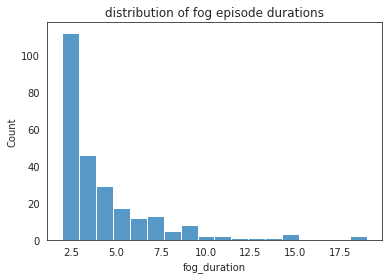

In [ ]:
sns.histplot(x='fog_duration', data=fog_df)
plt.title('distribution of fog episode durations')
plt.show()



Due to hour-resolution visibility measurements, the minimum visibilities of fog episodes are not vary granular, althogh the higher the minimum visibility, the shorter the fog durations were on average. 

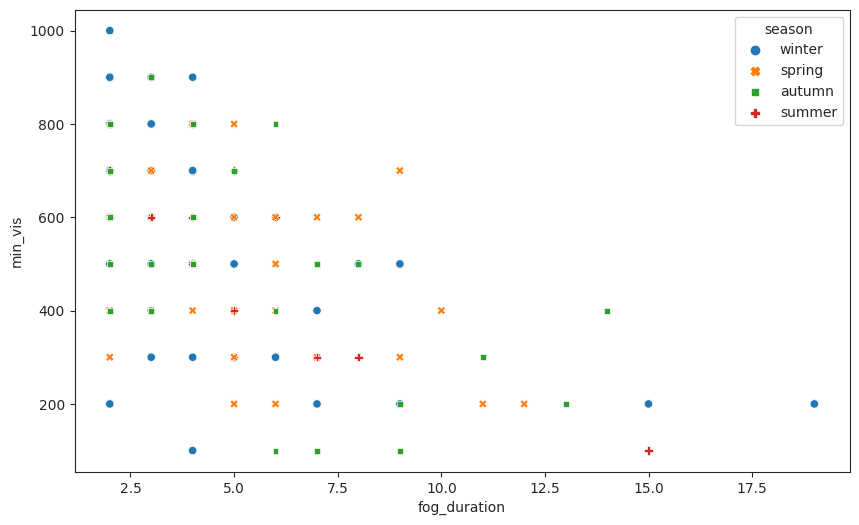

In [ ]:
# higher minimium visibilities yielded shorter fog episodes
#sns.set_style('ticks')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fog_duration', y='min_vis', data=fog_df, hue='season', style='season')

plt.show()

In [ ]:
# statistical characteristics of fog durations over Dublin Airport during 2011 to 2021
fog_df.groupby('season').agg(mean=('fog_duration', lambda x: np.round(x.mean(), 2)),
                             iqr=('fog_duration', lambda x: np.round(stats.iqr(x), 2)))

mean  iqr
season           
autumn  3.88  2.0
spring  4.34  4.0
summer  3.35  2.0
winter  3.91  2.0

The longest fog episodes were observed in winter, although spring showed the thickest tail. We then found that the season with the highest average fog duration was spring, with an average of 4 hrs 20 mins. As the fewest fog episodes occured in summer, the distribution of fog events in the summer is less well defined, but we can see that fog cleared up the fastest in the summer months.

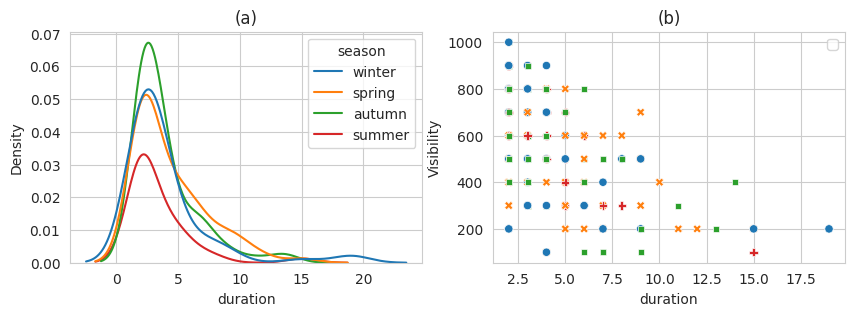

In [ ]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
sns.kdeplot(x='fog_duration', data=fog_df, hue='season', ax=axs[0])
sns.scatterplot(x='fog_duration', y='min_vis', data=fog_df, hue='season', style='season', ax=axs[1])
axs[0].set(xlabel='duration', title='(a)')
axs[1].set(xlabel='duration', ylabel='Visibility', title='(b)')
plt.legend("")
plt.show()

2011-01-20 20:00:00 2011-01-20 23:00:00


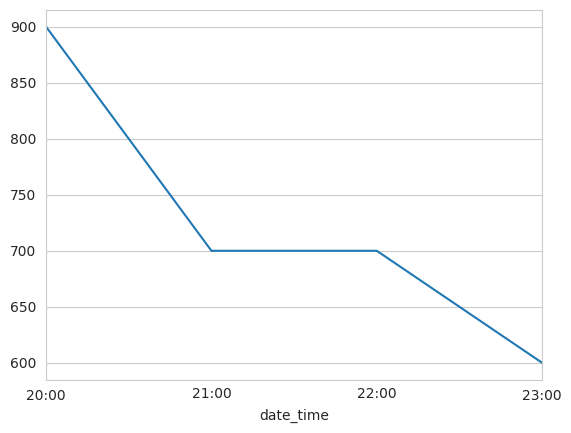

2011-01-22 20:00:00 2011-01-22 23:00:00


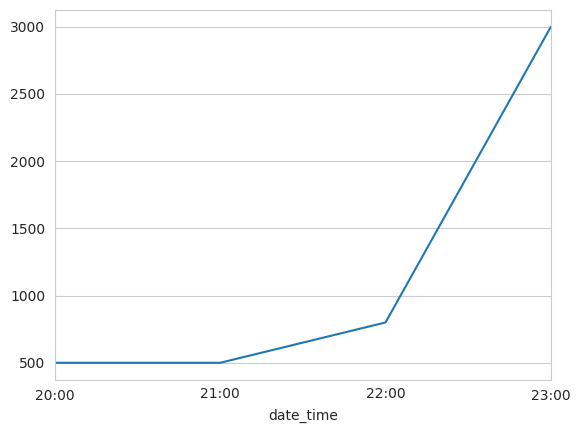

2011-01-23 08:00:00 2011-01-23 11:00:00


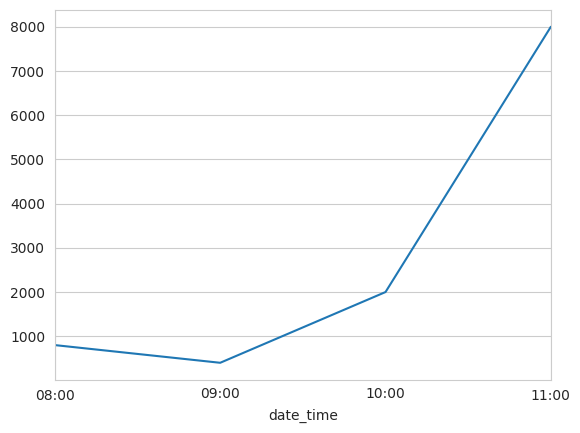

2011-02-10 09:00:00 2011-02-10 12:00:00


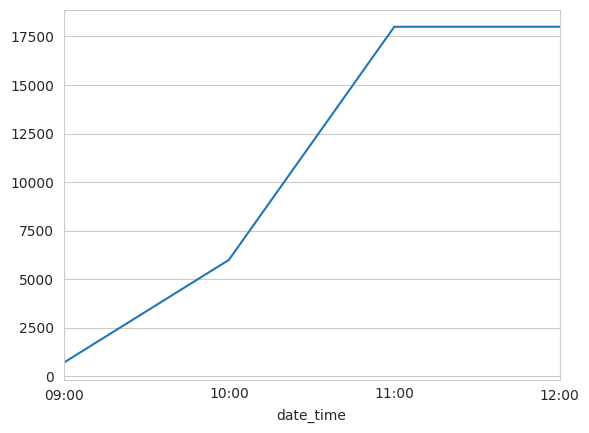

2011-02-11 04:00:00 2011-02-11 07:00:00


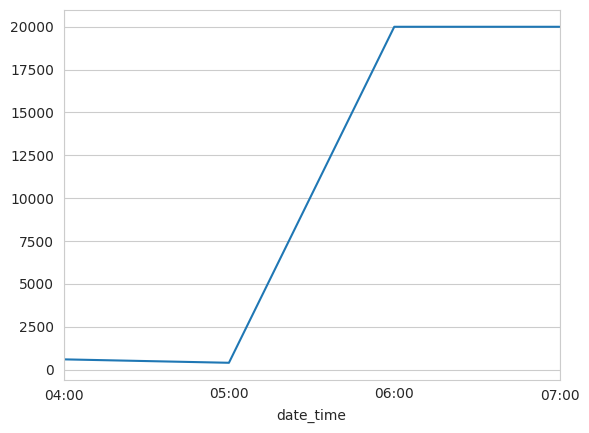

2011-02-17 04:00:00 2011-02-17 07:00:00


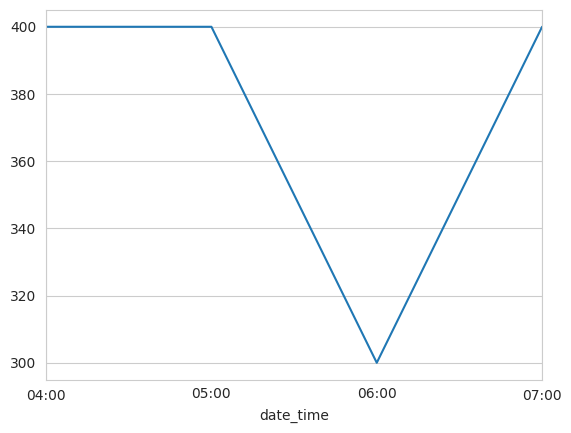

2011-02-19 18:00:00 2011-02-19 21:00:00


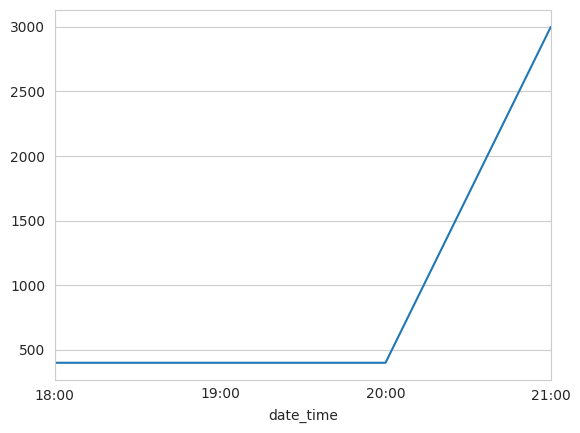

2011-03-03 01:00:00 2011-03-03 04:00:00


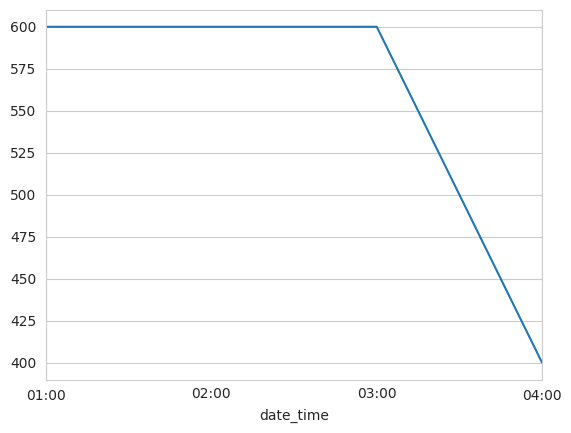

2011-03-24 07:00:00 2011-03-24 10:00:00


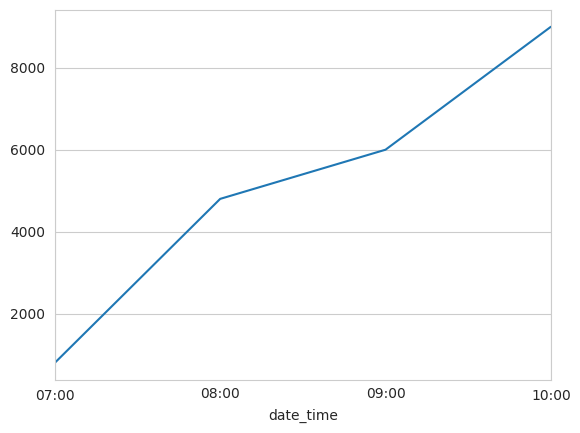

2011-03-25 04:00:00 2011-03-25 07:00:00


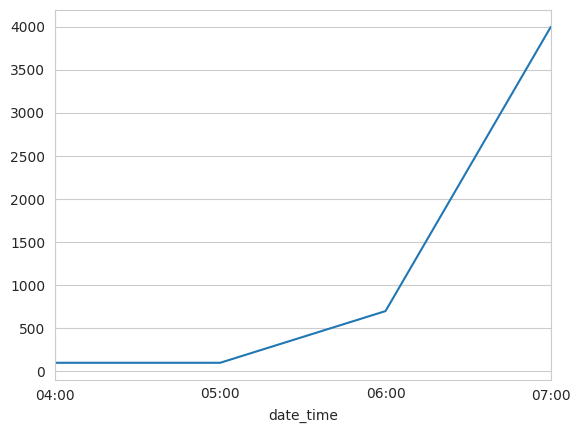

In [ ]:
# for each fog event, plot the first 4 hours afterwards
from datetime import datetime, timedelta

for i, event in fog_df.iloc[:10].iterrows():
  fog_start = i
  fog_offset = fog_start + timedelta(hours=3)
  print(fog_start, fog_offset)
  plt.cla()
  df.loc[(df.index >= fog_start) & (df.index <= fog_offset)].vis.plot()
  plt.show()

  

Fog forms when the air near the ground cools to the point that it can no longer hold all of the moisture in it. This can happen when warm, moist air comes in contact with a colder surface, such as the ground. In the colder months, the ground is cooler than in the warmer months, so it is more likely to cool the air above it to the point that fog forms. also, the temperature difference between the air and the ground is greater in the colder months, which can also contribute to the formation of fog. In general, fog is more likely to form in the early morning, as the ground cools overnight and the air above it is still relatively warm and moist.

Fog events occured in all seasons of the year at Dublin Airport, but much less in summer than in the other seasons. This is expected, as when the air is cooled, relative humidity rises as the air can hold less water. This leads to water droplets in the air condensing to form fog. In warmer temperatures the more water can be absorbed in the air and fog is less likely to occur.  

In [ ]:
df.groupby('season').agg(n_fog=('vis', lambda x: sum(x < 1000)),
                        n_non_fog=('vis', lambda x: sum(x >= 1000))).T

season     autumn  spring  summer  winter
n_fog         213     244      87     200
n_non_fog   24075   23324   24201   24088

In [ ]:
df.groupby('season')['rh'].describe()

count       mean        std   min   25%   50%   75%    max
season                                                              
autumn  24288.0  82.850708  11.362350  37.0  75.0  85.0  92.0  100.0
spring  23568.0  81.504158  12.238253  24.0  73.0  83.0  91.0  100.0
summer  24288.0  78.344944  13.805301  25.0  68.0  80.0  90.0  100.0
winter  24288.0  86.510581   8.024547  46.0  81.0  87.0  93.0  100.0

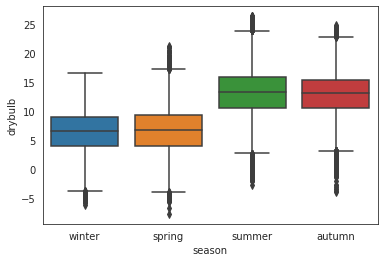

In [ ]:
# are the temperatures really that different when separated by season?
# Result: winter and spring temperatures are very similar. Summer and Autumn temperatures are very similar

sns.boxplot(x='season', y='drybulb', data=df)

<Axes: xlabel='season', ylabel='cbl'>

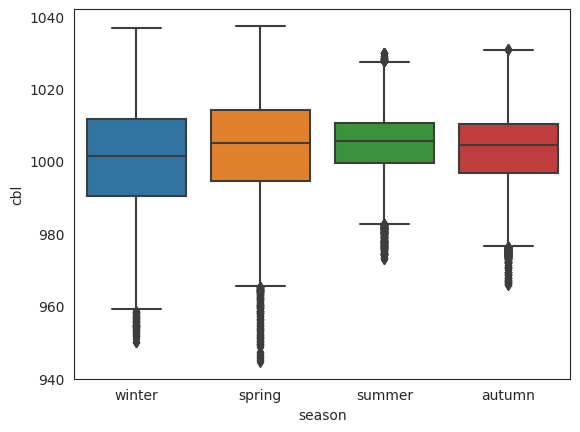

In [ ]:
sns.boxplot(x='season', y='cbl', data=df)

In [ ]:
fog_df[fog_df['fog_duration']==19]

date_time  fog_duration  min_vis  season
date_time                                                             
2014-11-20 03:00:00 2014-11-20 03:00:00            19      200  winter
2020-12-06 06:00:00 2020-12-06 06:00:00            19      200  winter

Fall and rise in visibility are sharp due to the hour-level granularity

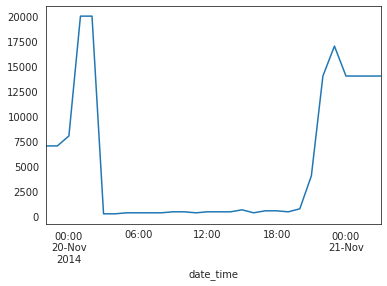

In [ ]:
df.loc[(df.index >= '2014-11-19 22:00:00') & (df.index <= '2014-11-21 03:00:00'), :].vis.plot()

In [ ]:
from datetime import datetime, timedelta
dt = pd.to_datetime('2014-11-19 22:00:00')
result = dt + timedelta(hours=3)
result

Timestamp('2014-11-20 01:00:00')

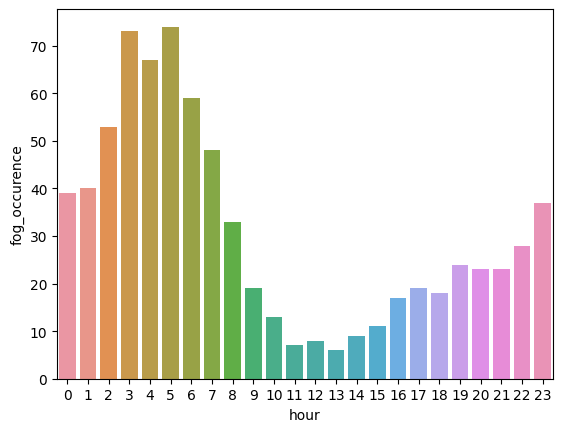

In [ ]:
# fog is more likely to occur in the morning hours
fog_hours = df.groupby('hour').agg(fog_occurence=('target_hr1', lambda x: sum(x == 1)))
sns.barplot(fog_hours, x=fog_hours.index, y='fog_occurence')
plt.show()

#### Fog climatology table

Number of fog days, fog events, and maximum duration of fog by month.

Percentage of fog episodes lasting more than 16 hours, more than 12 hours, less than 3, and less than 6 hours

In [ ]:
fog_df['month'] = fog_df.index.month
fog_df['year'] = fog_df.index.year

In [ ]:
fog_climate_table = fog_df.groupby('month').agg(
    fog_events=('fog_duration', 'count'),
    max_duration=('fog_duration', lambda x: x.max()),
    p_gt_16=('fog_duration', lambda x: np.round( ( (x >= 16).sum()/x.count() )*100, 1 ) ),
    p_gt_12=('fog_duration', lambda x: np.round( ( (x >= 12).sum()/x.count() )*100, 1 ) ),
    p_lt_3=('fog_duration', lambda x: np.round( ( (x < 3).sum()/x.count() )*100, 1 ) ),
    p_lt_6=('fog_duration', lambda x: np.round( ( (x < 6).sum()/x.count() )*100, 1 ) ),
)

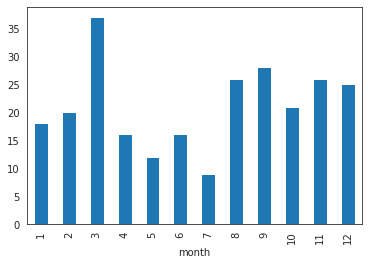

In [ ]:
fog_climate_table.fog_events.plot.bar()

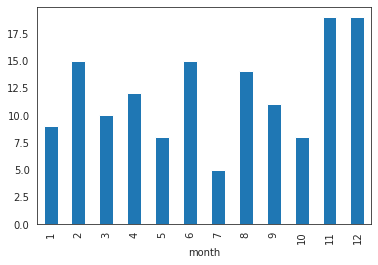

In [ ]:
fog_climate_table.max_duration.plot.bar()

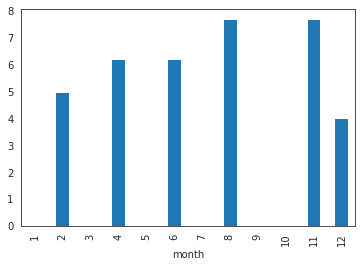

In [ ]:
fog_climate_table.p_gt_12.plot.bar()

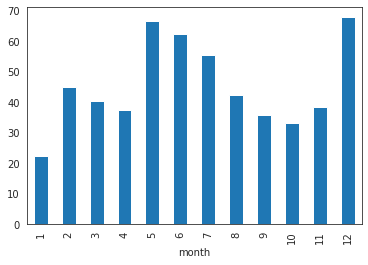

In [ ]:
fog_climate_table.p_lt_3.plot.bar()

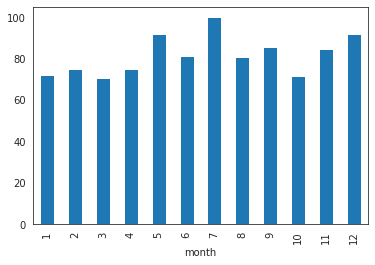

In [ ]:
fog_climate_table.p_lt_6.plot.bar()

In [ ]:
fog_climate_table

fog_events  max_duration  p_gt_16  p_gt_12  p_lt_3  p_lt_6
month                                                            
1              18             9      0.0      0.0    22.2    72.2
2              20            15      0.0      5.0    45.0    75.0
3              37            10      0.0      0.0    40.5    70.3
4              16            12      0.0      6.2    37.5    75.0
5              12             8      0.0      0.0    66.7    91.7
6              16            15      0.0      6.2    62.5    81.2
7               9             5      0.0      0.0    55.6   100.0
8              26            14      0.0      7.7    42.3    80.8
9              28            11      0.0      0.0    35.7    85.7
10             21             8      0.0      0.0    33.3    71.4
11             26            19      3.8      7.7    38.5    84.6
12             25            19      4.0      4.0    68.0    92.0

The most fog events occured in the spring month of March, while the least occured in July. There are low-visibility events at Dublin airport throughout the year, but the least of these occur in the Summer. The autumn and winter months show the most consisistently high number of fog events. The longest fog events occured in November and December; The first being a 19 hour fog episode on 20th November 2014 and the second on the 6th of December 2020. The smallest maximum durations occured in the summer months.

In terms of the event duration cutoffs, we can see that only November and December had fog events that lasted 16 or more hours. When we reduce the threshold to 12 hours, there are more months with fog events that exceeded this. Namely, February, June, and August. Note that for each of these months, at most 2 fog events exceeded the 12 hour duration.

For the lower-end cutoffs we see that the summer months have the shortest fog episodes in general, and not just the lowest max durations. Although note that most fog events in December lasted less than 3 hours, unlike the other cold months. All the fog events in July were less than 6 hours, and the vast majority were in all the other months also. The months with the least proportion of events lasting less than 6 hours was spring. From this analysis, we learnt that the high number of fog events in the March month in the last decade lead to Spring having the most fog events, but winter had the longest duration fog events. We will now look more granularly at the fog events in March by year to see if there was a spike at some points

In [ ]:
march_events = fog_df.loc[fog_df.index.month==3, :]
march_events.groupby(march_events.index.year).fog_duration.count()

date_time
2011     4
2012     2
2013     4
2014    10
2015     3
2016     2
2017     1
2018     7
2019     1
2020     1
2021     2
Name: fog_duration, dtype: int64

In the figures above we see that in 2014 and 2018 there were more fog events in March than usual.